In [3]:
# add ML4QS path so that we can easily load relevant functions
import sys
sys.path.append('ML4QS-master')
%matplotlib inline

import pandas as pd
import scipy.io as sio
import numpy as np
import os

from util.VisualizeDataset import VisualizeDataset

import matplotlib
import matplotlib.pyplot as plt

# Settings for matplotlib to ensure readable plots
plt.rcParams["figure.figsize"] = [20,15]
matplotlib.rc('font', **{'family' : 'normal', 'size'   : 22})
matplotlib.rc('xtick',labelsize=22)
matplotlib.rc('ytick',labelsize=22)

## Prepare dataset

In [18]:
# Features in Parkinson dataset
cols = {0:'acc_x', 1:'acc_y', 2:'acc_z', 3:'vel_x', 4:'vel_y', 5:'vel_z', 6:'label'}

# Classes / labels in Parkinson dataset
labeldict = {1.0: 'labelFreezingOfGait',
             2.0: 'labelBradykinesia', 
             3.0: 'labelSittingWithTremor',
             4.0: 'labelAtaxicGait',
             5.0: 'labelMyopathicGait',
             6.0: 'labelMuscleAtrophy',
             7.0: 'labelNoPathologicalGait'}

# Load data in dict: every key is pandas dataframe for 1 participant
data={}
source = './datasets/simulation-of-parkinson-movement-disorders/'
for root, dirs, filenames in os.walk(source):
    for fn in filenames:
        if 'dataset_' in fn:
            # load relevant .mat files
            df = pd.DataFrame(sio.loadmat(source+fn)[fn[:-4]])
            
            # rename columns to features
            df = df.rename(index=str, columns=cols)
            
            # rename labels to classes
            df['label'] = df['label'].map(labeldict)
            
            # Pandas datetime does not have centiseconds, so translate index to milliseconds
            df.index = np.arange(0,len(df.index)*10,10)
            df.index = pd.to_datetime(df.index, unit='ms')
            
            # one hot encode labels
            df = df.join(pd.get_dummies(df['label']))
            df=df.drop('label', axis=1)
            
            df['timestamps'] = df.index
            
            # add dataframe to data dictionary
            data[fn[:-4]] = df

In [19]:
# save as .csv files
savepath = './datasets/parkinson_data/raw/'

for k, v in data.items():
    data[k].to_csv(savepath+k+'.csv')

# 0. Choose granularity

In [12]:
from Chapter2.CreateDataset import CreateDataset
import math
from util.VisualizeDataset import VisualizeDataset
from util import util
import copy
import os

def roundup(x):
    return int(math.ceil(x))

def create_granularity(dataset_path, result_path, granularities, name):
    for milliseconds_per_instance in granularities:
        ## Prepare dataset
        print('granularity: ',milliseconds_per_instance)
        
        print('creating empty dataset...')
        # Create an initial dataset object with the base directory for our data and a granularity
        DataSet = CreateDataset(dataset_path, milliseconds_per_instance)


        # We add the accelerometer data of the phone
        print('adding data...')
        # choice: average
        DataSet.add_numerical_dataset('dataset_{}.csv'.format(name), 'timestamps', ['acc_x',
                                         'acc_y',
                                         'acc_z',
                                         'vel_x',
                                         'vel_y',
                                         'vel_z',
                                         'labelAtaxicGait',
                                         'labelBradykinesia',
                                         'labelFreezingOfGait',
                                         'labelMuscleAtrophy',
                                         'labelMyopathicGait',
                                         'labelNoPathologicalGait',
                                         'labelSittingWithTremor'], 'avg', '')

        # Get the resulting pandas data table
        print('converting data to panda data table...')
        dataset = DataSet.data_table

        # fix labels when multiple labels in same row
        for x in dataset.columns:
            if 'label' in x:
                dataset[x] = dataset[x].apply(roundup)


    #   Plot the data

        DataViz = VisualizeDataset()
        DataViz.plot_dataset_boxplot(dataset, ['acc_x','acc_y','acc_z', 'vel_x','vel_y','vel_z'])
        DataViz.plot_dataset(dataset, ['acc_x','acc_y','acc_z', 'vel_x','vel_y','vel_z', 'label'], ['like', 'like', 'like', 'like', 'like', 'like', 'like'], ['line', 'line', 'line', 'line', 'line', 'line', 'points'])

        util.print_statistics(dataset)

    print('Saving to csv...')
    # Finally, store the last dataset we have generated (250 ms).
    dataset.to_csv(result_dataset_path + 'granularities_{}.csv'.format(name))
    
    print('\n\n\n')

## Experimenting with different granularities

('granularity: ', 250)
creating empty dataset...
adding data...
converting data to panda data table...


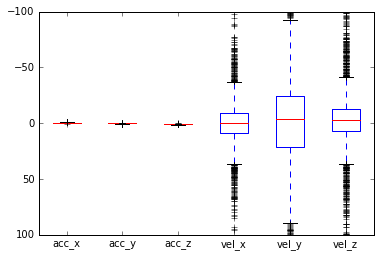

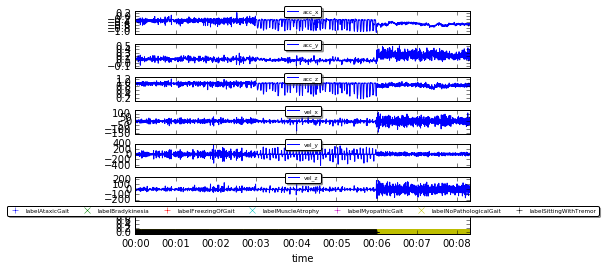

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.39442603416 0.200011146269 -1.06384488 0.23616272
acc_y 0.0 0.13374868296 0.0829769906747 -0.0793976 0.50834472
acc_z 0.0 0.88657753556 0.140547602922 0.15494976 1.18165296
vel_x 0.0 -0.238763 23.5964648442 -139.9636 116.6312
vel_y 0.0 -2.1520912 71.1374824861 -423.78 327.2192
vel_z 0.0 -3.0151268 36.7892906668 -181.1432 202.5716
labelAtaxicGait 0.0 0.0 0.0 0 0
labelBradykinesia 0.0 0.3605 0.480265632269 0 1
labelFreezingOfGait 0.0 0.36 0.480120045019 0 1
labelMuscleAtrophy 0.0 0.0 0.0 0 0
labelMyopathicGait 0.0 0.0 0.0 0 0
labelNoPathologicalGait 0.0 0.0 0.0 0 0
labelSittingWithTremor 0.0 0.2805 0.449355883855 0 1
('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


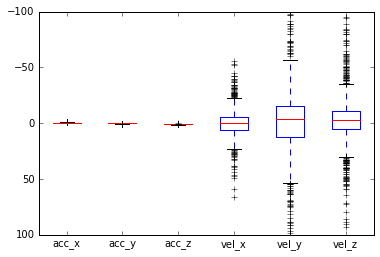

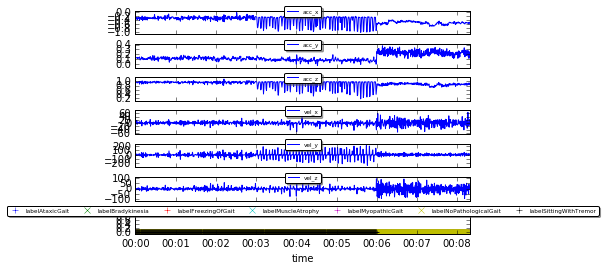

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.39442603416 0.186410570415 -1.0029498 -0.00527772
acc_y 0.0 0.13374868296 0.0713857793354 -0.03596804 0.37470104
acc_z 0.0 0.88657753556 0.128782843671 0.17539452 1.10198696
vel_x 0.0 -0.238763 12.9182875982 -55.8152 65.8546
vel_y 0.0 -2.1520912 50.5664294795 -250.054 215.222
vel_z 0.0 -3.0151268 22.6914686904 -94.8808 92.5708
labelAtaxicGait 0.0 0.0 0.0 0 0
labelBradykinesia 0.0 0.361 0.480530862599 0 1
labelFreezingOfGait 0.0 0.36 0.48024018015 0 1
labelMuscleAtrophy 0.0 0.0 0.0 0 0
labelMyopathicGait 0.0 0.0 0.0 0 0
labelNoPathologicalGait 0.0 0.0 0.0 0 0
labelSittingWithTremor 0.0 0.281 0.449712398363 0 1
('granularity: ', 1000)
creating empty dataset...
adding data...
converting data to panda data table...


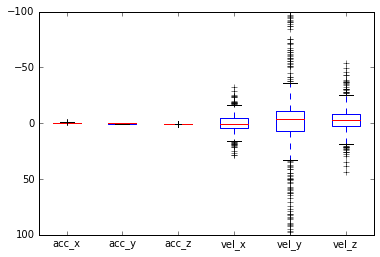

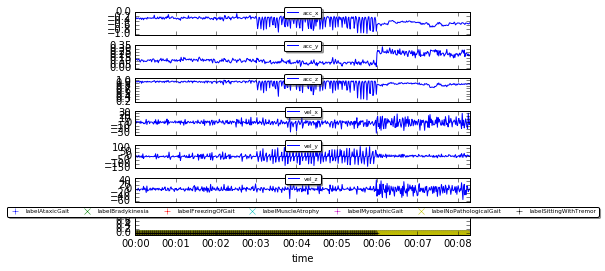

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.39442603416 0.171211147621 -0.97848026 -0.07443098
acc_y 0.0 0.13374868296 0.0665477103425 0.0144936 0.32800676
acc_z 0.0 0.88657753556 0.115423876675 0.26827068 1.01140928
vel_x 0.0 -0.238763 8.17836877184 -32.4954 28.1904
vel_y 0.0 -2.1520912 36.4125283463 -128.1322 119.8204
vel_z 0.0 -3.0151268 12.2609914027 -53.9077 43.617
labelAtaxicGait 0.0 0.0 0.0 0 0
labelBradykinesia 0.0 0.362 0.481060118567 0 1
labelFreezingOfGait 0.0 0.36 0.480480721202 0 1
labelMuscleAtrophy 0.0 0.0 0.0 0 0
labelMyopathicGait 0.0 0.0 0.0 0 0
labelNoPathologicalGait 0.0 0.0 0.0 0 0
labelSittingWithTremor 0.0 0.282 0.450423981963 0 1
('granularity: ', 60000)
creating empty dataset...
adding data...
converting data to panda data table...


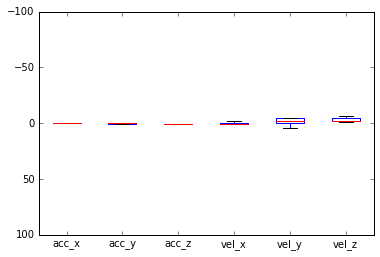

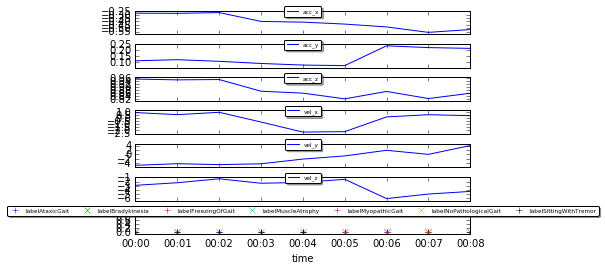

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.403762926593 0.110084305834 -0.562715829667 -0.267124652667
acc_y 0.0 0.13992591637 0.0671795031461 0.071714162 0.238733748
acc_z 0.0 0.88458872337 0.0518592311182 0.823106611 0.952275717333
vel_x 0.0 -0.194046481481 1.23699781408 -2.25926166667 0.903361666667
vel_y 0.0 -1.69694259259 3.19794371026 -4.99702 3.992415
vel_z 0.0 -3.11529296296 1.65784828041 -6.08939333333 -1.33309166667
labelAtaxicGait 0.0 0.0 0.0 0 0
labelBradykinesia 0.0 0.444444444444 0.527046276695 0 1
labelFreezingOfGait 0.0 0.333333333333 0.5 0 1
labelMuscleAtrophy 0.0 0.0 0.0 0 0
labelMyopathicGait 0.0 0.0 0.0 0 0
labelNoPathologicalGait 0.0 0.0 0.0 0 0
labelSittingWithTremor 0.0 0.444444444444 0.527046276695 0 1
Saving to csv...






In [2]:
dataset_path = './datasets/parkinson_data/raw/'
result_dataset_path = './datasets/parkinson_data/0_granularities'
granularities = [250, 500, 1000, 60000]

create_granularity(dataset_path, result_dataset_path, granularities)


## Choosing granularity of 500 and saving of file

('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


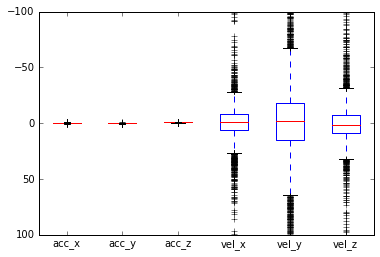

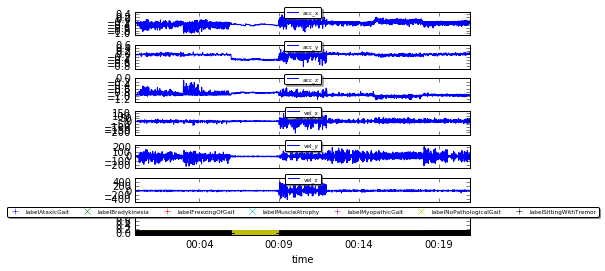

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.282685828366 0.174906611605 -1.00243008 0.43027448
acc_y 0.0 -0.0756088686092 0.143961987526 -0.84719484 0.49896048
acc_z 0.0 -0.916987865772 0.110780094912 -1.23491328 -0.0999058
vel_x 0.0 -0.917986687839 22.0738917984 -211.0906 142.086
vel_y 0.0 -1.31031922721 48.8443508355 -218.9306 213.9662
vel_z 0.0 0.721830885272 49.119123487 -413.0658 503.4652
labelAtaxicGait 0.0 0.143310837634 0.35045912676 0 1
labelBradykinesia 0.0 0.143310837634 0.35045912676 0 1
labelFreezingOfGait 0.0 0.142913854704 0.350054467739 0 1
labelMuscleAtrophy 0.0 0.142913854704 0.350054467739 0 1
labelMyopathicGait 0.0 0.142913854704 0.350054467739 0 1
labelNoPathologicalGait 0.0 0.143310837634 0.35045912676 0 1
labelSittingWithTremor 0.0 0.143310837634 0.35045912676 0 1
Saving to csv...




('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


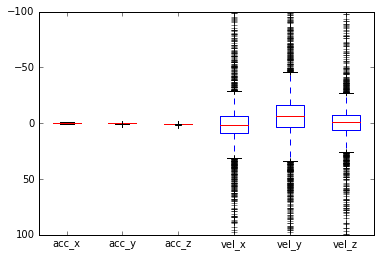

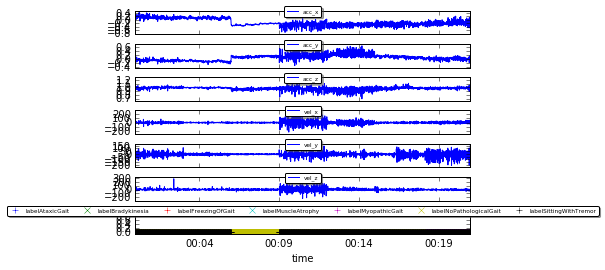

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.138929451968 0.195465637263 -0.72552668 0.42351324
acc_y 0.0 0.0690335774672 0.13383606722 -0.31324964 0.65530592
acc_z 0.0 0.967677251052 0.0418021030735 0.69091772 1.22083936
vel_x 0.0 1.06922966786 31.2229075257 -220.99 240.779
vel_y 0.0 -7.27163001191 35.9285999592 -207.4996 152.796
vel_z 0.0 0.224242874156 27.934443522 -231.5152 276.3908
labelAtaxicGait 0.0 0.143310837634 0.35045912676 0 1
labelBradykinesia 0.0 0.143310837634 0.35045912676 0 1
labelFreezingOfGait 0.0 0.142913854704 0.350054467739 0 1
labelMuscleAtrophy 0.0 0.142913854704 0.350054467739 0 1
labelMyopathicGait 0.0 0.142913854704 0.350054467739 0 1
labelNoPathologicalGait 0.0 0.143310837634 0.35045912676 0 1
labelSittingWithTremor 0.0 0.143310837634 0.35045912676 0 1
Saving to csv...




('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


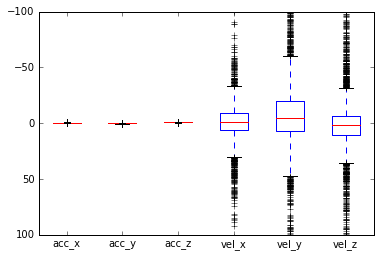

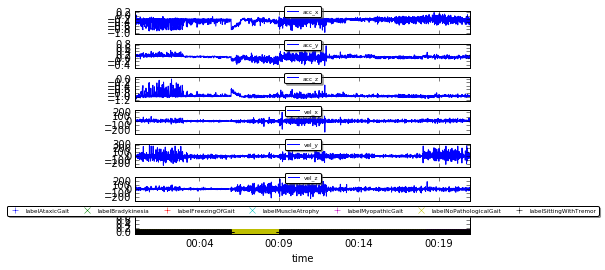

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.2930752289 0.165412308069 -0.9780496 0.17442584
acc_y 0.0 0.0638718835517 0.104438459948 -0.4452146 0.72752748
acc_z 0.0 -0.946806990181 0.114346605687 -1.12801688 -0.02155496
vel_x 0.0 -0.748053513299 22.5975384619 -249.9952 195.9692
vel_y 0.0 -4.84821370914 47.1840522183 -246.2208 275.5452
vel_z 0.0 1.36662490406 37.4205161895 -233.0412 250.4068
labelAtaxicGait 0.0 0.143310837634 0.35045912676 0 1
labelBradykinesia 0.0 0.143310837634 0.35045912676 0 1
labelFreezingOfGait 0.0 0.142913854704 0.350054467739 0 1
labelMuscleAtrophy 0.0 0.142913854704 0.350054467739 0 1
labelMyopathicGait 0.0 0.142913854704 0.350054467739 0 1
labelNoPathologicalGait 0.0 0.143310837634 0.35045912676 0 1
labelSittingWithTremor 0.0 0.143310837634 0.35045912676 0 1
Saving to csv...




('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


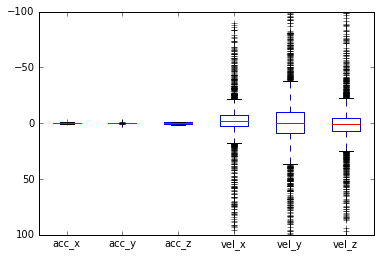

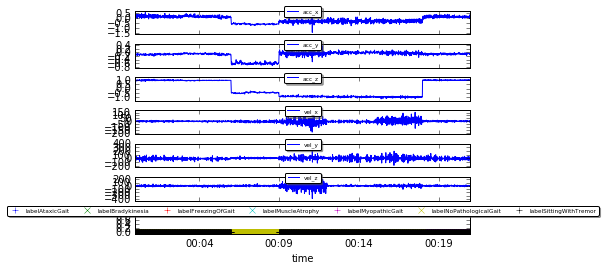

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.139634415657 0.29960784864 -1.4678918 0.58529256
acc_y 0.0 -0.14351602429 0.19893390169 -0.73084832 0.36045632
acc_z 0.0 -0.0547101869207 0.921531341915 -1.21881904 1.1447992
vel_x 0.0 -2.09817612809 20.135909599 -185.591 154.6454
vel_y 0.0 0.00674638083896 30.5702984547 -190.1256 348.2388
vel_z 0.0 0.184850946143 32.3510366435 -393.9334 217.2562
labelAtaxicGait 0.0 0.143310837634 0.35045912676 0 1
labelBradykinesia 0.0 0.143310837634 0.35045912676 0 1
labelFreezingOfGait 0.0 0.142913854704 0.350054467739 0 1
labelMuscleAtrophy 0.0 0.142913854704 0.350054467739 0 1
labelMyopathicGait 0.0 0.142913854704 0.350054467739 0 1
labelNoPathologicalGait 0.0 0.143310837634 0.35045912676 0 1
labelSittingWithTremor 0.0 0.143310837634 0.35045912676 0 1
Saving to csv...




('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


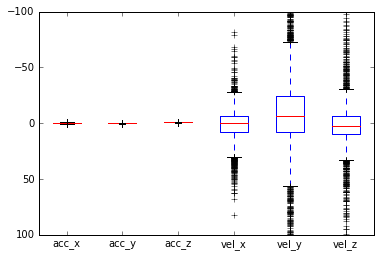

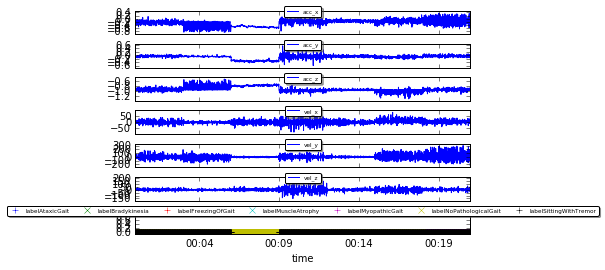

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.257890944539 0.198276141638 -0.85741112 0.38435612
acc_y 0.0 -0.107292240842 0.113017779367 -0.6041318 0.55391416
acc_z 0.0 -0.930391820601 0.101472594239 -1.31968376 -0.52788668
vel_x 0.0 1.24504425036 15.7090110935 -81.4996 82.0848
vel_y 0.0 -4.19485277226 59.7997038487 -227.915333333 300.1376
vel_z 0.0 1.6630115919 24.5267092817 -152.4124 192.269
labelAtaxicGait 0.0 0.143310837634 0.35045912676 0 1
labelBradykinesia 0.0 0.143310837634 0.35045912676 0 1
labelFreezingOfGait 0.0 0.142913854704 0.350054467739 0 1
labelMuscleAtrophy 0.0 0.142913854704 0.350054467739 0 1
labelMyopathicGait 0.0 0.142913854704 0.350054467739 0 1
labelNoPathologicalGait 0.0 0.143310837634 0.35045912676 0 1
labelSittingWithTremor 0.0 0.143310837634 0.35045912676 0 1
Saving to csv...




('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


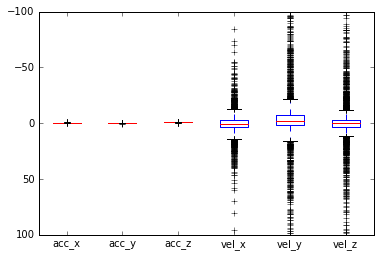

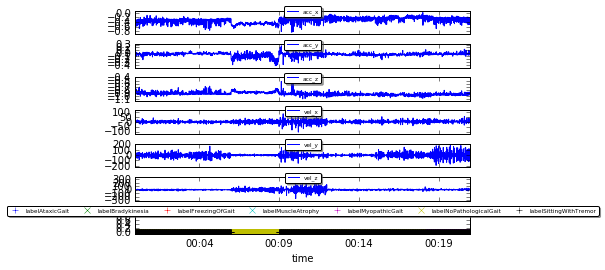

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.317415246616 0.120098922844 -0.8542318 0.00521916
acc_y 0.0 -0.0381214069975 0.0596605610315 -0.40766056 0.25625612
acc_z 0.0 -0.931554850459 0.0501134006238 -1.09454984 -0.45316168
vel_x 0.0 0.151825248114 12.0379908137 -105.6594 96.0232
vel_y 0.0 -3.05875212386 31.6448666664 -193.3022 178.1108
vel_z 0.0 -0.6375674474 26.5905926301 -254.9834 311.3544
labelAtaxicGait 0.0 0.143310837634 0.35045912676 0 1
labelBradykinesia 0.0 0.143310837634 0.35045912676 0 1
labelFreezingOfGait 0.0 0.142913854704 0.350054467739 0 1
labelMuscleAtrophy 0.0 0.142913854704 0.350054467739 0 1
labelMyopathicGait 0.0 0.142913854704 0.350054467739 0 1
labelNoPathologicalGait 0.0 0.143310837634 0.35045912676 0 1
labelSittingWithTremor 0.0 0.143310837634 0.35045912676 0 1
Saving to csv...




('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


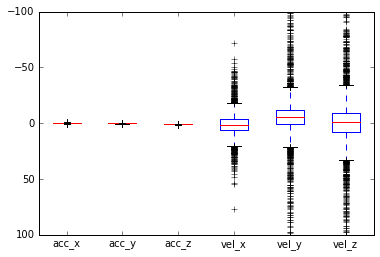

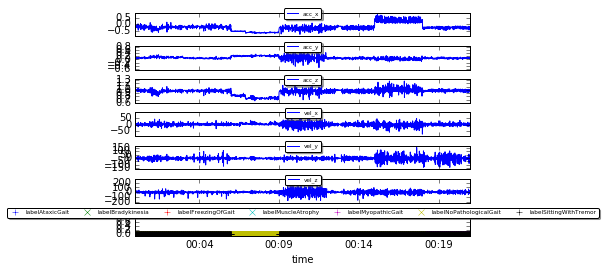

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.224407232658 0.277373090563 -0.8143744 0.79991984
acc_y 0.0 0.103729587381 0.0867363617245 -0.50837888 0.73032616
acc_z 0.0 0.939408946344 0.0851522067979 0.65915136 1.2679216
vel_x 0.0 1.16798978431 11.6083766813 -71.6268 76.776
vel_y 0.0 -5.66741452958 24.8623087126 -139.0494 155.6408
vel_z 0.0 -1.29417522827 32.1783961863 -174.993 239.75
labelAtaxicGait 0.0 0.143310837634 0.35045912676 0 1
labelBradykinesia 0.0 0.143310837634 0.35045912676 0 1
labelFreezingOfGait 0.0 0.142913854704 0.350054467739 0 1
labelMuscleAtrophy 0.0 0.142913854704 0.350054467739 0 1
labelMyopathicGait 0.0 0.142913854704 0.350054467739 0 1
labelNoPathologicalGait 0.0 0.143310837634 0.35045912676 0 1
labelSittingWithTremor 0.0 0.143310837634 0.35045912676 0 1
Saving to csv...




('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


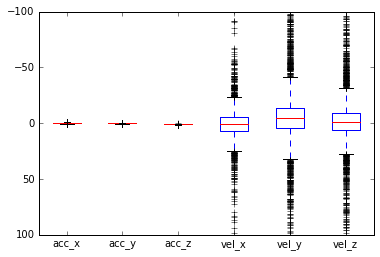

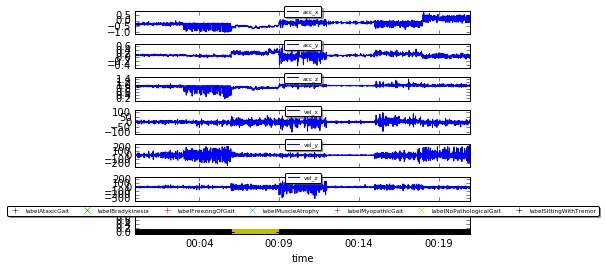

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.222538775779 0.254831223376 -1.0029498 0.69317472
acc_y 0.0 0.121732844055 0.0961997216361 -0.44149848 0.61425536
acc_z 0.0 0.943144494646 0.102429447241 0.17539452 1.38486348
vel_x 0.0 0.245105967977 16.1396194418 -100.912 98.0868
vel_y 0.0 -4.34739423051 45.9130168729 -250.054 230.195
vel_z 0.0 -2.26548955935 35.5505742693 -302.1774 214.3456
labelAtaxicGait 0.0 0.143310837634 0.35045912676 0 1
labelBradykinesia 0.0 0.143310837634 0.35045912676 0 1
labelFreezingOfGait 0.0 0.142913854704 0.350054467739 0 1
labelMuscleAtrophy 0.0 0.142913854704 0.350054467739 0 1
labelMyopathicGait 0.0 0.142913854704 0.350054467739 0 1
labelNoPathologicalGait 0.0 0.143310837634 0.35045912676 0 1
labelSittingWithTremor 0.0 0.143310837634 0.35045912676 0 1
Saving to csv...




('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


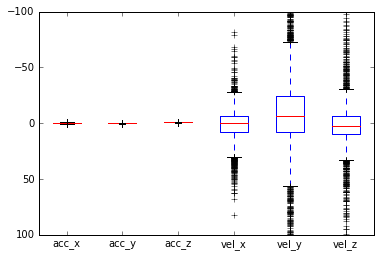

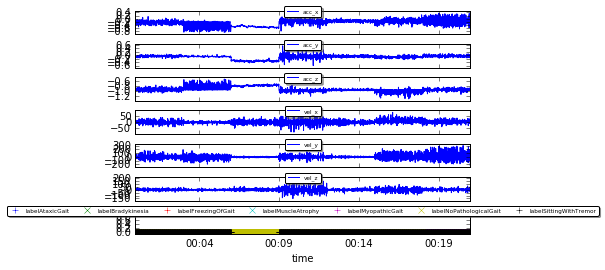

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 -0.257890944539 0.198276141638 -0.85741112 0.38435612
acc_y 0.0 -0.107292240842 0.113017779367 -0.6041318 0.55391416
acc_z 0.0 -0.930391820601 0.101472594239 -1.31968376 -0.52788668
vel_x 0.0 1.24504425036 15.7090110935 -81.4996 82.0848
vel_y 0.0 -4.19485277226 59.7997038487 -227.915333333 300.1376
vel_z 0.0 1.6630115919 24.5267092817 -152.4124 192.269
labelAtaxicGait 0.0 0.143310837634 0.35045912676 0 1
labelBradykinesia 0.0 0.143310837634 0.35045912676 0 1
labelFreezingOfGait 0.0 0.142913854704 0.350054467739 0 1
labelMuscleAtrophy 0.0 0.142913854704 0.350054467739 0 1
labelMyopathicGait 0.0 0.142913854704 0.350054467739 0 1
labelNoPathologicalGait 0.0 0.143310837634 0.35045912676 0 1
labelSittingWithTremor 0.0 0.143310837634 0.35045912676 0 1
Saving to csv...




('granularity: ', 500)
creating empty dataset...
adding data...
converting data to panda data table...


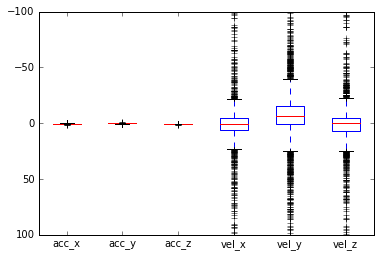

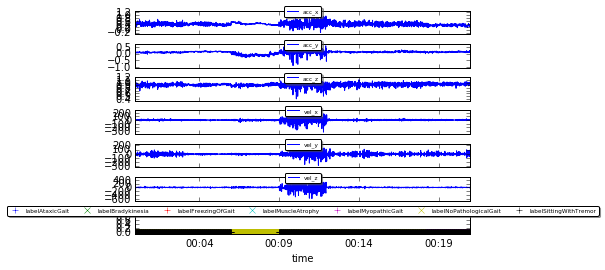

column, fraction missing values, mean, standard deviation, min, max
acc_x 0.0 0.37059452678 0.116364195067 -0.18726268 1.17635816
acc_y 0.0 0.090400119873 0.109956618708 -0.89270816 0.58137636
acc_z 0.0 0.920573395241 0.0605723525746 0.39754676 1.13246988
vel_x 0.0 0.67170062194 29.7086472942 -323.9922 209.93
vel_y 0.0 -6.86894243748 31.0846089174 -276.7548 198.058
vel_z 0.0 0.659615641127 60.5849521031 -583.6208 454.034
labelAtaxicGait 0.0 0.143310837634 0.35045912676 0 1
labelBradykinesia 0.0 0.143310837634 0.35045912676 0 1
labelFreezingOfGait 0.0 0.142913854704 0.350054467739 0 1
labelMuscleAtrophy 0.0 0.142913854704 0.350054467739 0 1
labelMyopathicGait 0.0 0.142913854704 0.350054467739 0 1
labelNoPathologicalGait 0.0 0.143310837634 0.35045912676 0 1
labelSittingWithTremor 0.0 0.143310837634 0.35045912676 0 1
Saving to csv...






In [20]:
dataset_path = './datasets/parkinson_data/raw/'
result_dataset_path = './datasets/parkinson_data/'

for k,v in data.items():
    name = k[8:]
    create_granularity(dataset_path, result_dataset_path, [500], name)

# 1. Handling noise and missing values

In [26]:
# Combine all data for Kalman filter

files = []
source = './datasets/parkinson_data/0_granularities/'
for root, dirs, filenames in os.walk(source):
    for fn in filenames:
        files.append(pd.read_csv(source+fn))

data = pd.concat(files)
data.to_csv('./datasets/parkinson_data/0_granularities/combined.csv')

## Apply Kalman Filter

In [25]:
import numpy as np
from pykalman import KalmanFilter

# Implements the Kalman filter for single columns.
class KalmanFilters:

    # Very simple Kalman filter: fill missing values and remove outliers for single attribute.
    # We assume a very simple transition matrix, namely simply a [[1]]. It
    # is however still useful as it is able to dampen outliers and impute missing values. The new
    # values are appended in a new column.
    def apply_kalman_filter(self, data_table, col):
        # Initialize the Kalman filter with the trivial transition and observation matrices.
        kf = KalmanFilter(transition_matrices = [[1]], observation_matrices = [[1]])

        numpy_array_state = data_table.as_matrix(columns=[col])
        numpy_array_state = numpy_array_state.astype(np.float32)
        numpy_matrix_state_with_mask = np.ma.masked_invalid(numpy_array_state)

        # Find the best other parameters based on the data (e.g. Q)
        kf = kf.em(numpy_matrix_state_with_mask, n_iter=5)

        # And apply the filter.
        (new_data, filtered_state_covariances) = kf.filter(numpy_matrix_state_with_mask)

        data_table[col + '_kalman'] = new_data
        return data_table

In [39]:
# Kalman filters
original_dataset = pd.read_csv('./datasets/parkinson_data/0_granularities/combined.csv', index_col=1)
original_dataset.index = original_dataset.index.to_datetime()
del original_dataset['Unnamed: 0']

DataViz = VisualizeDataset()
KalFilter = KalmanFilters()


for feature in cols.values()[:-1]:
    print('current feature: ',feature)
    kalman_dataset = KalFilter.apply_kalman_filter(original_dataset, feature)
    original_dataset = kalman_dataset

/Users/davidstap/anaconda2/envs/ml4qs/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  app.launch_new_instance()


('current feature: ', 'acc_x')
('current feature: ', 'acc_y')
('current feature: ', 'acc_z')
('current feature: ', 'vel_x')
('current feature: ', 'vel_y')
('current feature: ', 'vel_z')


## Visualize Kalman Filter result

feature:  acc_x


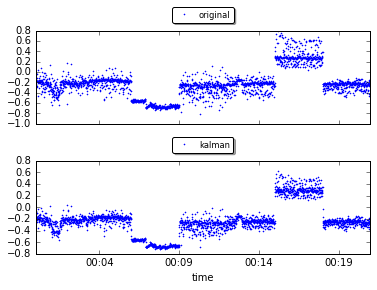

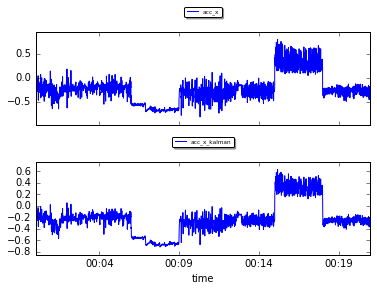

feature:  acc_y


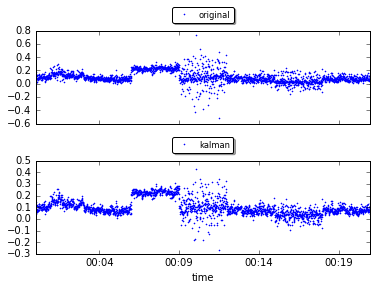

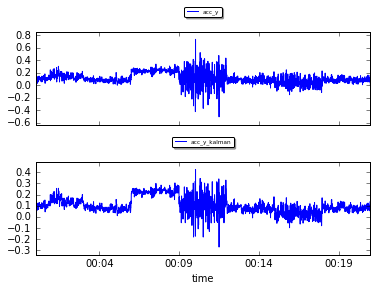

feature:  acc_z


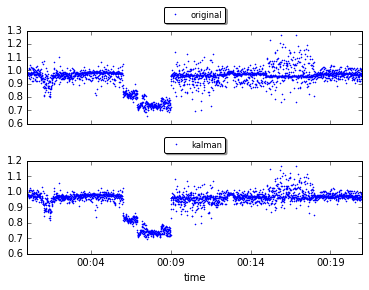

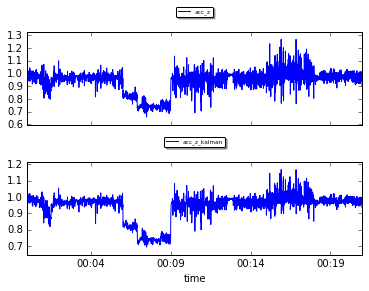

feature:  vel_x


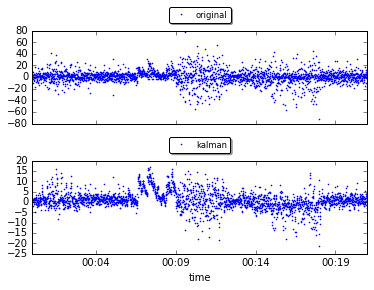

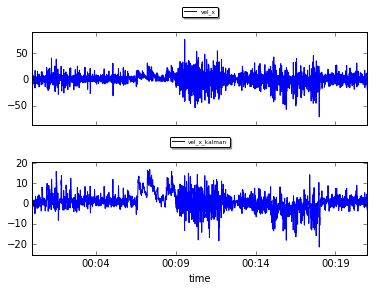

feature:  vel_y


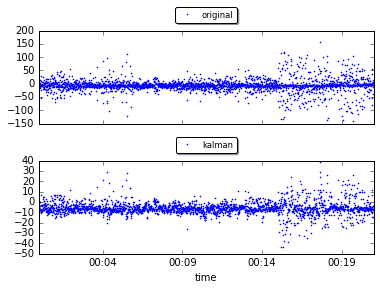

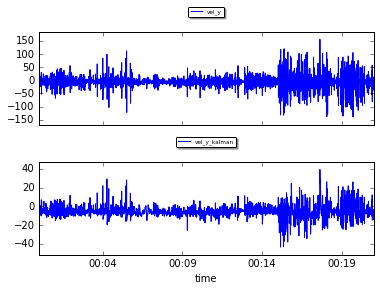

feature:  vel_z


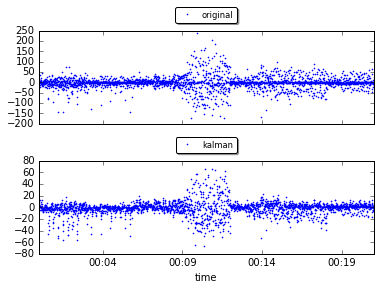

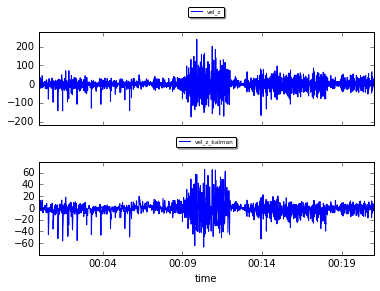

In [54]:
for feature in cols.values()[:-1]:
    print 'feature: ', feature
    
    # plot for 1st person
    DataViz.plot_imputed_values(kalman_dataset[:len(kalman_dataset)/10], ['original', 'kalman'], feature, kalman_dataset[feature+'_kalman'][:len(kalman_dataset)/10])
    DataViz.plot_dataset(kalman_dataset[:len(kalman_dataset)/10], [feature, feature+'_kalman'], ['exact','exact'], ['line', 'line'])

## Apply PCA

In [71]:
from Chapter3.DataTransformation import PrincipalComponentAnalysis

PCA = PrincipalComponentAnalysis()
selected_predictor_cols = [c for c in kalman_dataset.columns if ( ('kalman' in c))]
pc_values = PCA.determine_pc_explained_variance(kalman_dataset, selected_predictor_cols)

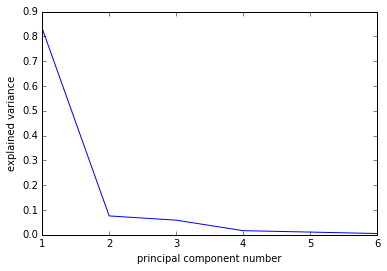

In [72]:
import matplotlib.pyplot as plt

# Plot the variance explained.
plt.plot(range(1, len(selected_predictor_cols)+1), pc_values, 'b-')
plt.xlabel('principal component number')
plt.ylabel('explained variance')
plt.show(block=False)

In [79]:
kalman_dataset

,acc_x,acc_y,acc_z,vel_x,vel_y,vel_z,labelAtaxicGait,labelBradykinesia,labelFreezingOfGait,labelMuscleAtrophy,labelMyopathicGait,labelNoPathologicalGait,labelSittingWithTremor,acc_x_kalman,acc_y_kalman,acc_z_kalman,vel_x_kalman,vel_y_kalman,vel_z_kalman
1970-01-01 00:00:00.000,-0.148267,0.069977,0.986192,1.619800,-6.3112,-0.9184,0,0,1,0,0,0,0,-0.142784,0.073162,0.975490,0.760506,-3.229982,0.648986
1970-01-01 00:00:00.500,-0.149535,0.071541,0.986465,1.524600,-6.0522,-0.8260,0,0,1,0,0,0,0,-0.146972,0.072144,0.982430,0.848816,-3.526851,0.424877
1970-01-01 00:00:01.000,-0.028043,0.177986,1.001008,0.872200,1.2180,15.0584,0,0,1,0,0,0,0,-0.069200,0.141835,0.994731,0.853423,-2.663107,4.062318
1970-01-01 00:00:01.500,-0.226120,0.004243,0.979567,-9.865800,8.1914,14.6860,0,0,1,0,0,0,0,-0.172440,0.050755,0.984639,-1.786997,-0.162085,7.243442
1970-01-01 00:00:02.000,-0.247521,0.039953,0.968438,8.596000,-16.1056,-5.0022,0,0,1,0,0,0,0,-0.221872,0.043600,0.973851,1.050921,-4.276083,3.281444
1970-01-01 00:00:02.500,-0.183095,0.089097,0.980980,3.319400,-9.1336,0.0056,0,0,1,0,0,0,0,-0.196340,0.073737,0.978599,1.702669,-5.601879,2.186011
1970-01-01 00:00:03.000,-0.203969,0.085188,0.972467,-0.211400,-7.1078,-0.7238,0,0,1,0,0,0,0,-0.201363,0.081322,0.974515,1.139286,-6.024636,1.199086
1970-01-01 00:00:03.500,-0.181573,0.078185,0.980128,-2.822400,-10.7310,6.6948,0,0,1,0,0,0,0,-0.188332,0.079244,0.978253,-0.040592,-7.364719,3.074497
1970-01-01 00:00:04.000,-0.176690,0.070252,0.979128,2.916200,-6.5646,-5.0624,0,0,1,0,0,0,0,-0.180667,0.073288,0.978836,0.845073,-7.135258,0.290454
1970-01-01 00:00:04.500,-0.180143,0.070377,0.979841,0.726600,-5.7120,6.3756,0,0,1,0,0,0,0,-0.180322,0.071360,0.979505,0.809487,-6.725612,2.374860


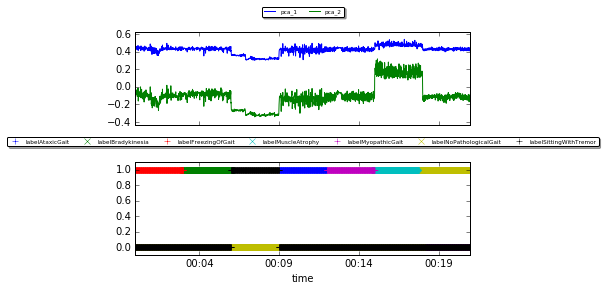

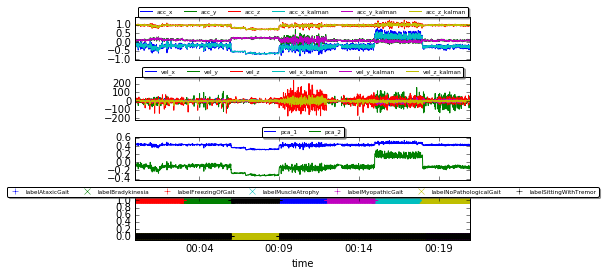

In [81]:
import copy 
n_pcs = 2


dataset = PCA.apply_pca(copy.deepcopy(kalman_dataset), selected_predictor_cols, n_pcs)

#And we visualize the result of the PC's
DataViz.plot_dataset(dataset[:len(dataset)/10], ['pca_', 'label'], ['like', 'like'], ['line', 'points'])

# And the overall final dataset:
DataViz.plot_dataset(dataset[:len(dataset)/10], ['acc_', 'vel_', 'pca_', 'label'], ['like', 'like', 'like', 'like'], ['line', 'line', 'line', 'points'])

In [84]:
# Store the outcome.
dataset.to_csv('./datasets/parkinson_data/1_kalman/including_pca.csv')

# 2. Feature engineering

In [30]:
dataset = pd.read_csv('./datasets/parkinson_data/1_kalman/including_pca.csv', index_col=0)

### Time domain: numerical data

In [31]:
participant = len(dataset)/10
data = []

dataset.index = dataset.index.to_datetime()

# split data into participants
ranges = np.arange(0,len(dataset)+len(dataset)/10,len(dataset)/10)
for i in range(10):
    data.append(dataset[ranges[i]:ranges[i+1]])
data[0]

/Users/davidstap/anaconda2/envs/ml4qs/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


,acc_x,acc_y,acc_z,vel_x,vel_y,vel_z,labelAtaxicGait,labelBradykinesia,labelFreezingOfGait,labelMuscleAtrophy,...,labelNoPathologicalGait,labelSittingWithTremor,acc_x_kalman,acc_y_kalman,acc_z_kalman,vel_x_kalman,vel_y_kalman,vel_z_kalman,pca_1,pca_2
1970-01-01 00:00:00.000,-0.148267,0.069977,0.986192,1.619800,-6.3112,-0.9184,0,0,1,0,...,0,0,-0.142784,0.073162,0.975490,0.760506,-3.229982,0.648986,0.436598,-0.057670
1970-01-01 00:00:00.500,-0.149535,0.071541,0.986465,1.524600,-6.0522,-0.8260,0,0,1,0,...,0,0,-0.146972,0.072144,0.982430,0.848816,-3.526851,0.424877,0.438930,-0.059998
1970-01-01 00:00:01.000,-0.028043,0.177986,1.001008,0.872200,1.2180,15.0584,0,0,1,0,...,0,0,-0.069200,0.141835,0.994731,0.853423,-2.663107,4.062318,0.458054,-0.031274
1970-01-01 00:00:01.500,-0.226120,0.004243,0.979567,-9.865800,8.1914,14.6860,0,0,1,0,...,0,0,-0.172440,0.050755,0.984639,-1.786997,-0.162085,7.243442,0.434702,-0.069801
1970-01-01 00:00:02.000,-0.247521,0.039953,0.968438,8.596000,-16.1056,-5.0022,0,0,1,0,...,0,0,-0.221872,0.043600,0.973851,1.050921,-4.276083,3.281444,0.426057,-0.092276
1970-01-01 00:00:02.500,-0.183095,0.089097,0.980980,3.319400,-9.1336,0.0056,0,0,1,0,...,0,0,-0.196340,0.073737,0.978599,1.702669,-5.601879,2.186011,0.433663,-0.083771
1970-01-01 00:00:03.000,-0.203969,0.085188,0.972467,-0.211400,-7.1078,-0.7238,0,0,1,0,...,0,0,-0.201363,0.081322,0.974515,1.139286,-6.024636,1.199086,0.432504,-0.086847
1970-01-01 00:00:03.500,-0.181573,0.078185,0.980128,-2.822400,-10.7310,6.6948,0,0,1,0,...,0,0,-0.188332,0.079244,0.978253,-0.040592,-7.364719,3.074497,0.434925,-0.080407
1970-01-01 00:00:04.000,-0.176690,0.070252,0.979128,2.916200,-6.5646,-5.0624,0,0,1,0,...,0,0,-0.180667,0.073288,0.978836,0.845073,-7.135258,0.290454,0.435182,-0.076123
1970-01-01 00:00:04.500,-0.180143,0.070377,0.979841,0.726600,-5.7120,6.3756,0,0,1,0,...,0,0,-0.180322,0.071360,0.979505,0.809487,-6.725612,2.374860,0.435187,-0.075731


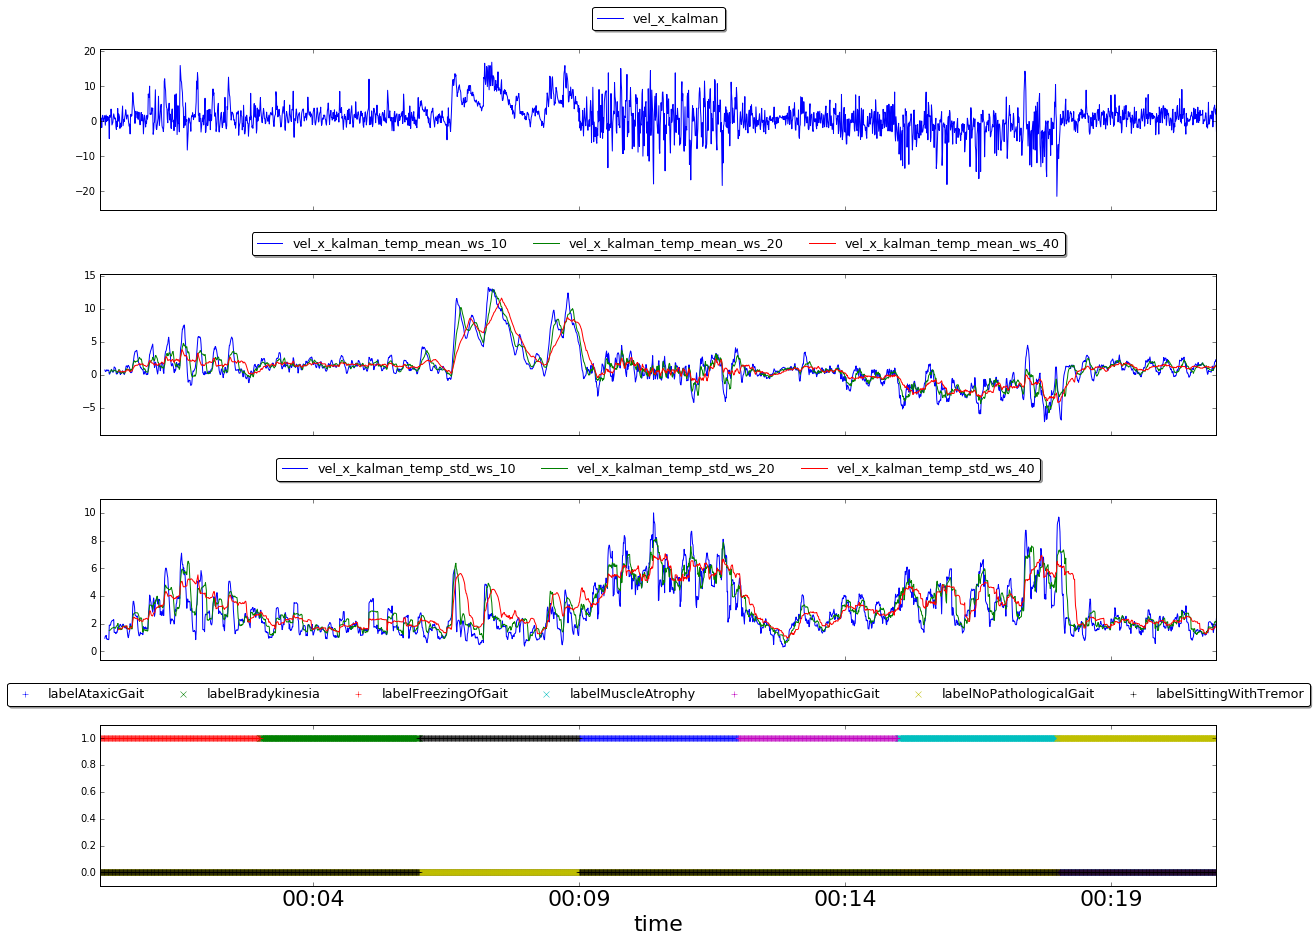

In [21]:
from Chapter4.TemporalAbstraction import NumericalAbstraction
import copy
milliseconds_per_instance = 500

# Set the window sizes to the number of instances representing 5 seconds, 30 seconds and 5 minutes
window_sizes = [int(float(5000)/milliseconds_per_instance), int(float(10000)/milliseconds_per_instance), int(float(20000)/milliseconds_per_instance)]

NumAbs = NumericalAbstraction()

for dataset in data[:1]:
    dataset_copy = copy.deepcopy(dataset)
    for ws in window_sizes:
        dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['vel_x_kalman'], ws, 'mean')
        dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['vel_x_kalman'], ws, 'std')
    DataViz.plot_dataset(dataset_copy, ['vel_x_kalman', 'vel_x_kalman_temp_mean', 'vel_x_kalman_temp_std', 'label'], ['exact', 'like', 'like', 'like'], ['line', 'line', 'line', 'points'])

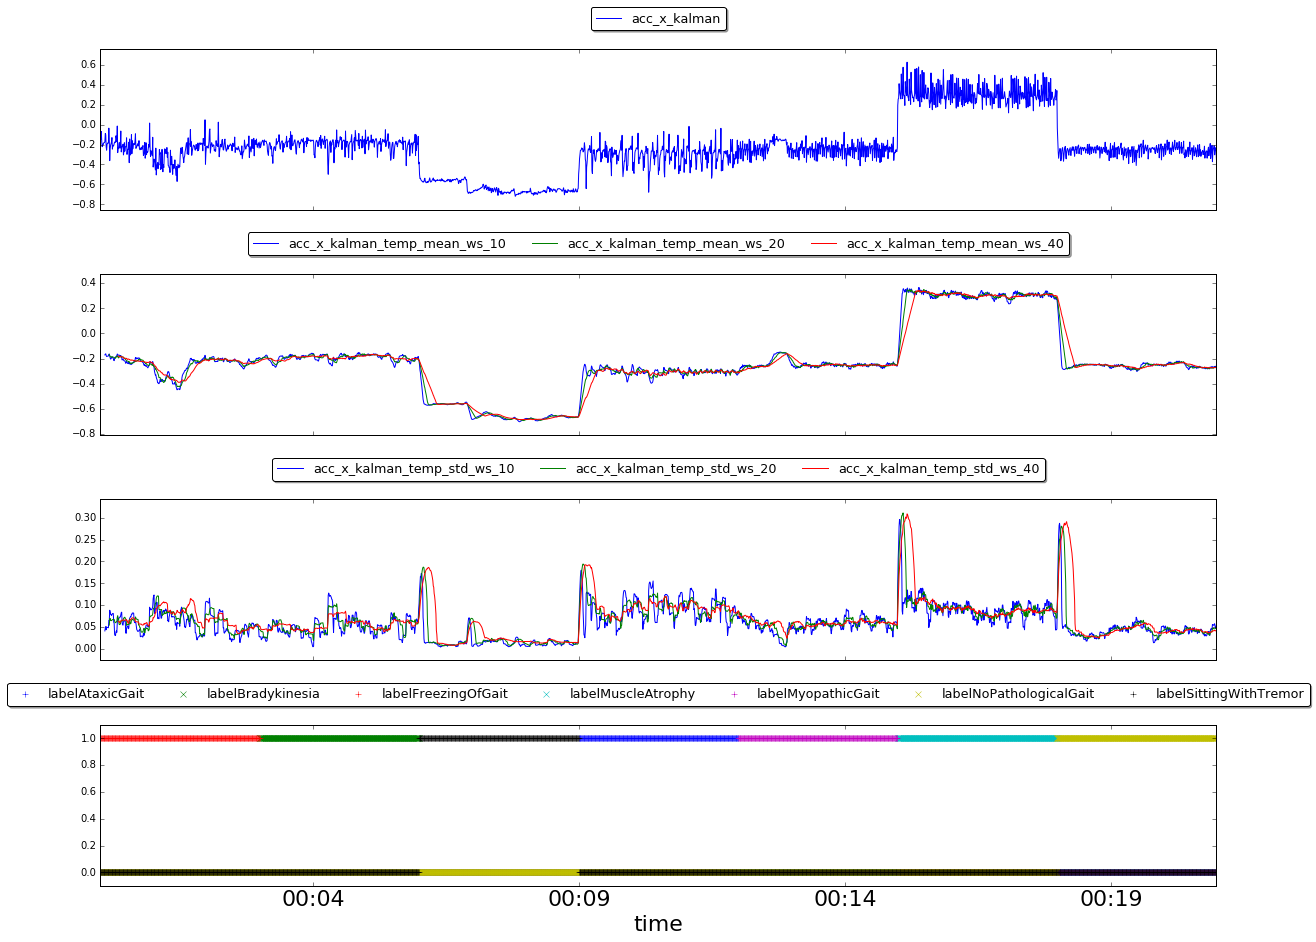

In [22]:
from Chapter4.TemporalAbstraction import NumericalAbstraction
import copy
milliseconds_per_instance = 500

# Set the window sizes to the number of instances representing 5 seconds, 30 seconds and 5 minutes
window_sizes = [int(float(5000)/milliseconds_per_instance), int(float(10000)/milliseconds_per_instance), int(float(20000)/milliseconds_per_instance)]

NumAbs = NumericalAbstraction()

for dataset in data[:1]:
    dataset_copy = copy.deepcopy(dataset)
    for ws in window_sizes:
        dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['acc_x_kalman'], ws, 'mean')
        dataset_copy = NumAbs.abstract_numerical(dataset_copy, ['acc_x_kalman'], ws, 'std')
    DataViz.plot_dataset(dataset_copy, ['acc_x_kalman', 'acc_x_kalman_temp_mean', 'acc_x_kalman_temp_std', 'label'], ['exact', 'like', 'like', 'like'], ['line', 'line', 'line', 'points'])

In [34]:
ws1 = int(float(10000)/milliseconds_per_instance)
ws2 = int(float(20000)/milliseconds_per_instance)
for i,dataset in enumerate(data):
    selected_predictor_cols = [c for c in dataset.columns if 'kalman' in c]
    print selected_predictor_cols
    dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws1, 'mean')
    dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws1, 'std')
    dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws2, 'mean')
    dataset = NumAbs.abstract_numerical(dataset, selected_predictor_cols, ws2, 'std')
    data[i] = dataset
    print i

['acc_x_kalman', 'acc_y_kalman', 'acc_z_kalman', 'vel_x_kalman', 'vel_y_kalman', 'vel_z_kalman']
0
['acc_x_kalman', 'acc_y_kalman', 'acc_z_kalman', 'vel_x_kalman', 'vel_y_kalman', 'vel_z_kalman']
1
['acc_x_kalman', 'acc_y_kalman', 'acc_z_kalman', 'vel_x_kalman', 'vel_y_kalman', 'vel_z_kalman']
2
['acc_x_kalman', 'acc_y_kalman', 'acc_z_kalman', 'vel_x_kalman', 'vel_y_kalman', 'vel_z_kalman']
3
['acc_x_kalman', 'acc_y_kalman', 'acc_z_kalman', 'vel_x_kalman', 'vel_y_kalman', 'vel_z_kalman']
4
['acc_x_kalman', 'acc_y_kalman', 'acc_z_kalman', 'vel_x_kalman', 'vel_y_kalman', 'vel_z_kalman']
5
['acc_x_kalman', 'acc_y_kalman', 'acc_z_kalman', 'vel_x_kalman', 'vel_y_kalman', 'vel_z_kalman']
6
['acc_x_kalman', 'acc_y_kalman', 'acc_z_kalman', 'vel_x_kalman', 'vel_y_kalman', 'vel_z_kalman']
7
['acc_x_kalman', 'acc_y_kalman', 'acc_z_kalman', 'vel_x_kalman', 'vel_y_kalman', 'vel_z_kalman']
8
['acc_x_kalman', 'acc_y_kalman', 'acc_z_kalman', 'vel_x_kalman', 'vel_y_kalman', 'vel_z_kalman']
9


In [44]:
# add mean for every NaN
for i,dataset in enumerate(data):
    for c in dataset.columns:
        if 'mean' in c or 'std' in c:
            data[i][c] = data[i][c].fillna(data[i][c].mean())

### Fourier transform and resulting features

person  0


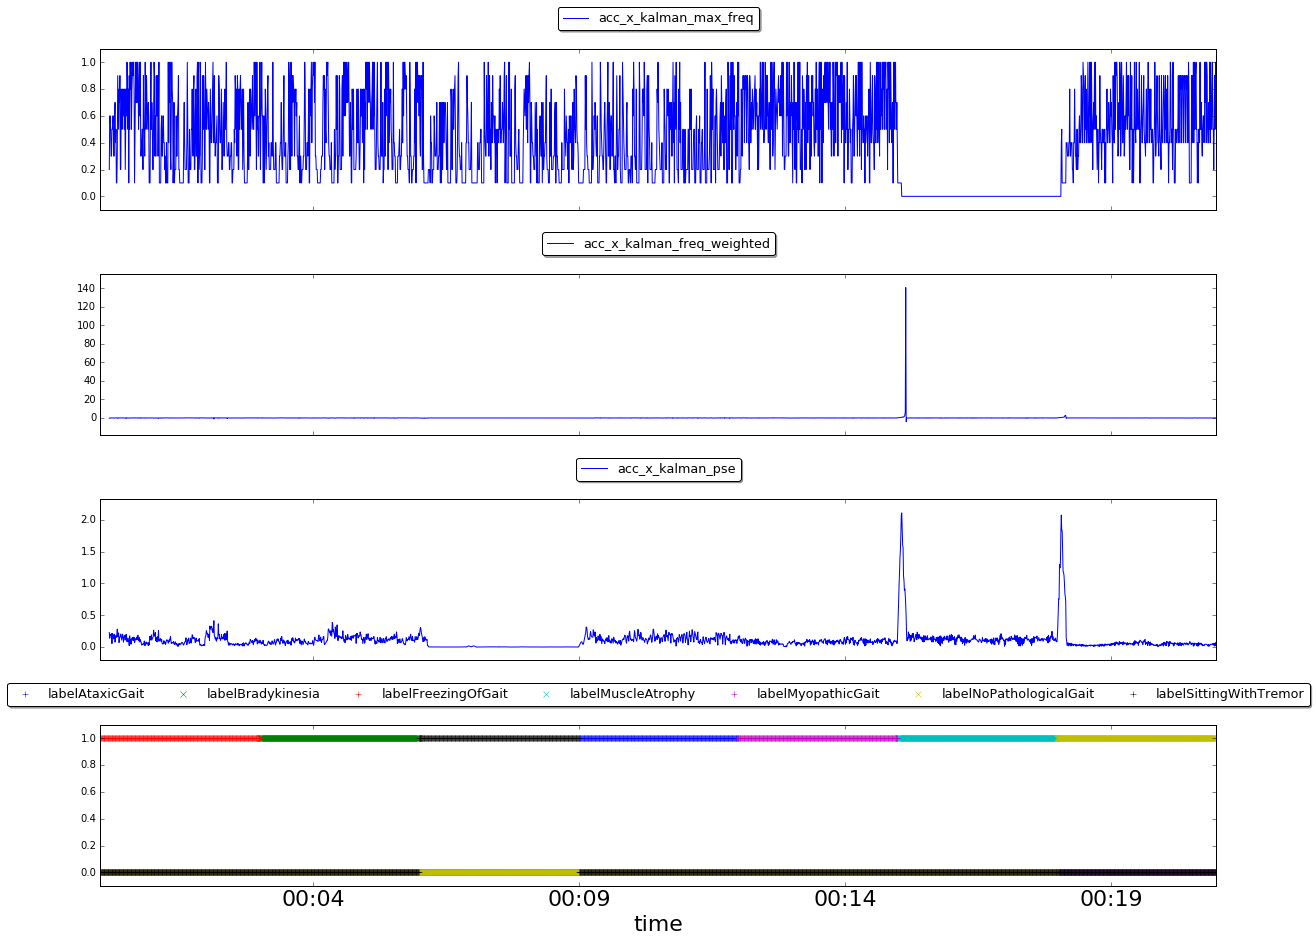

person  1


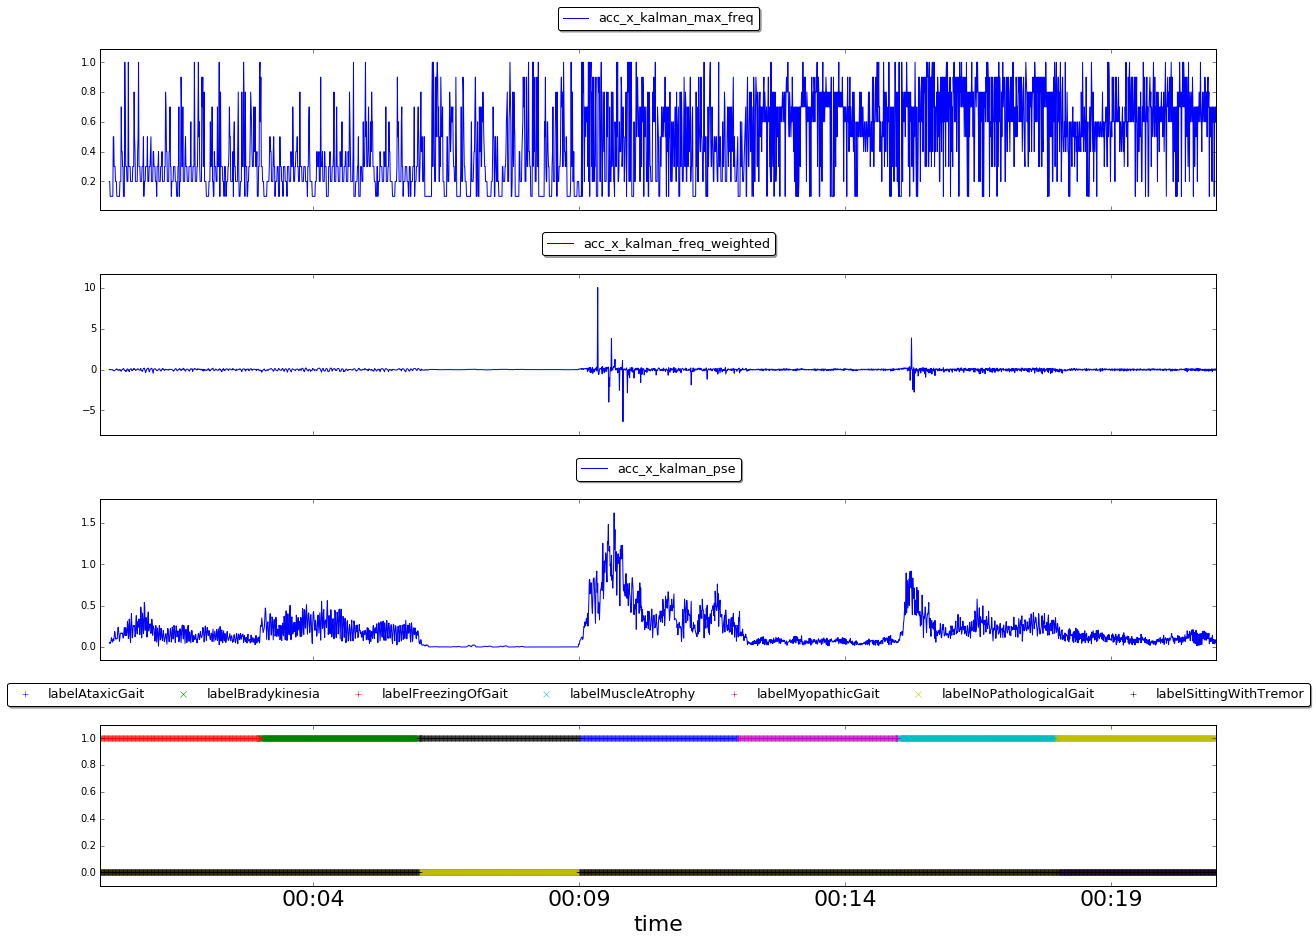

person  2


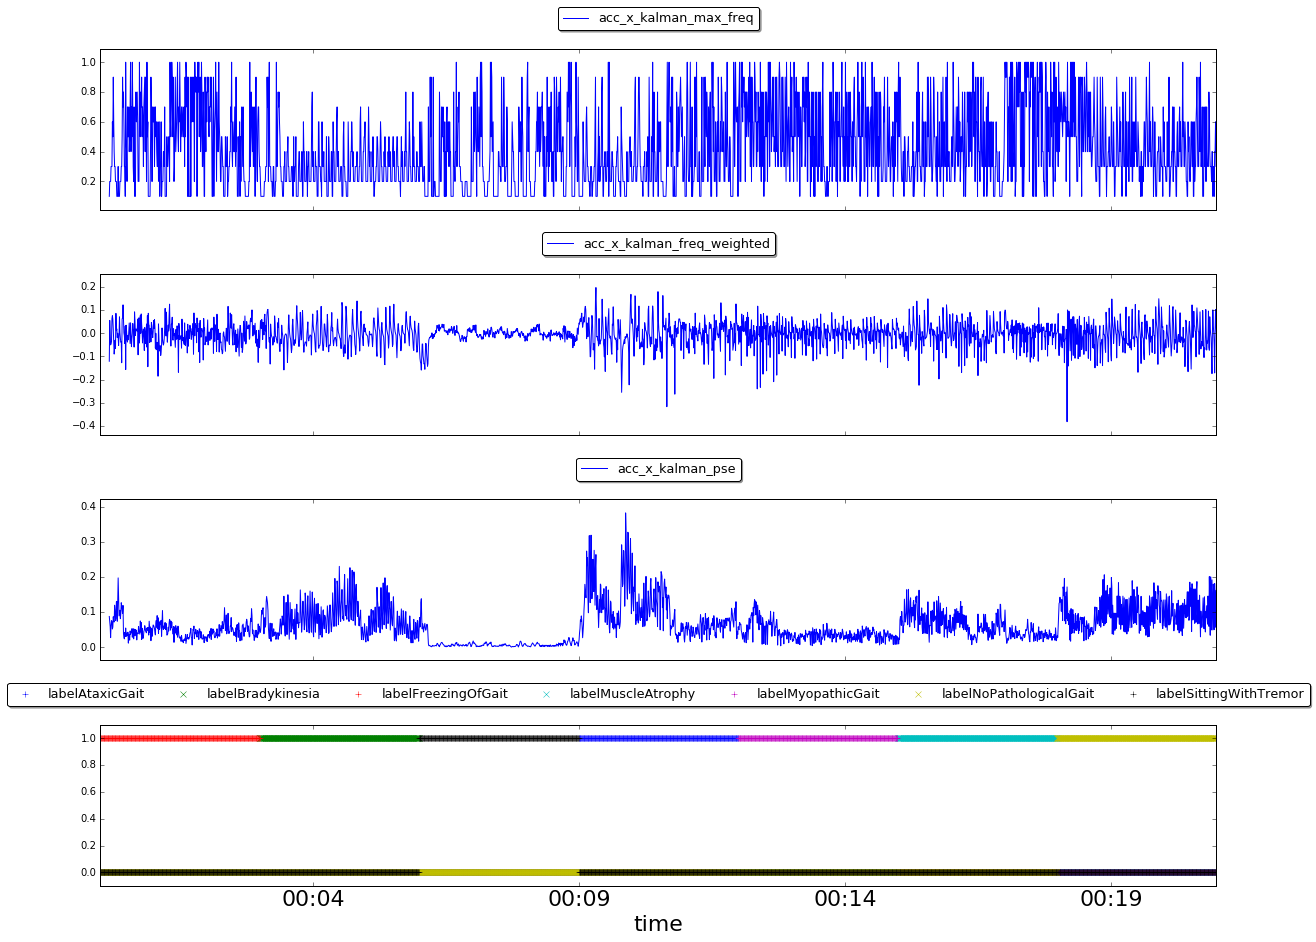

person  3


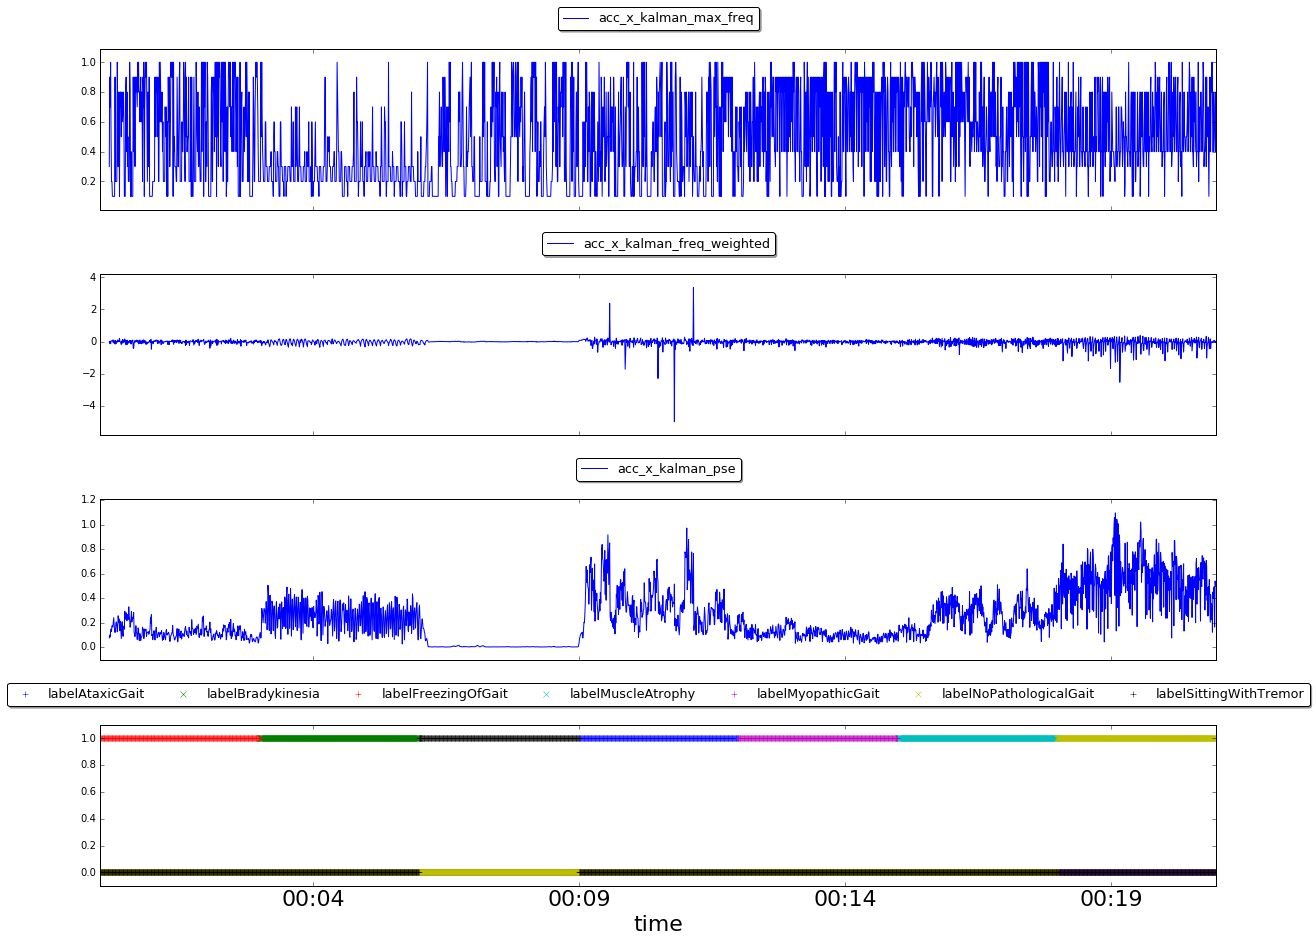

person  4


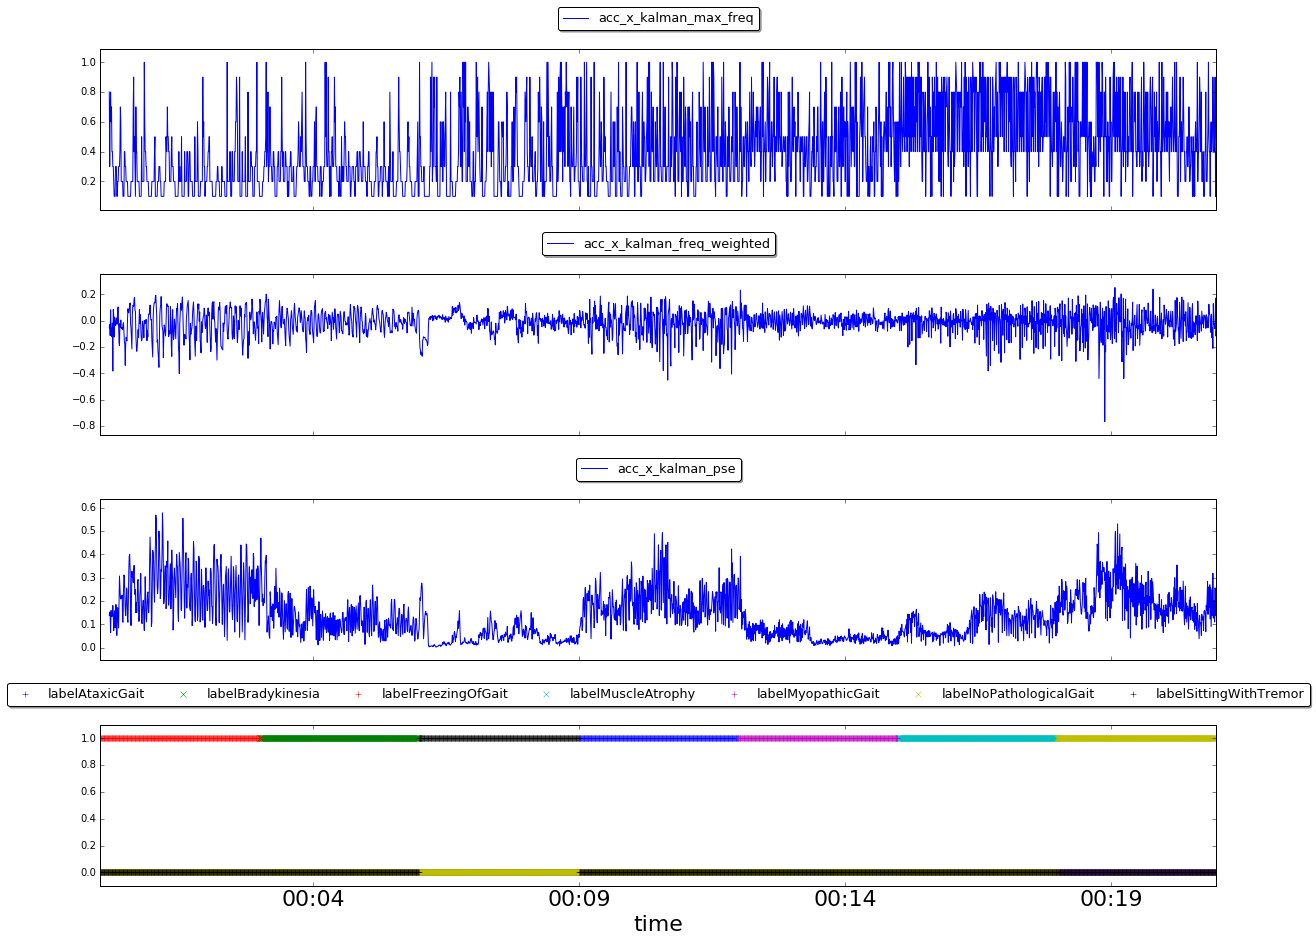

person  5


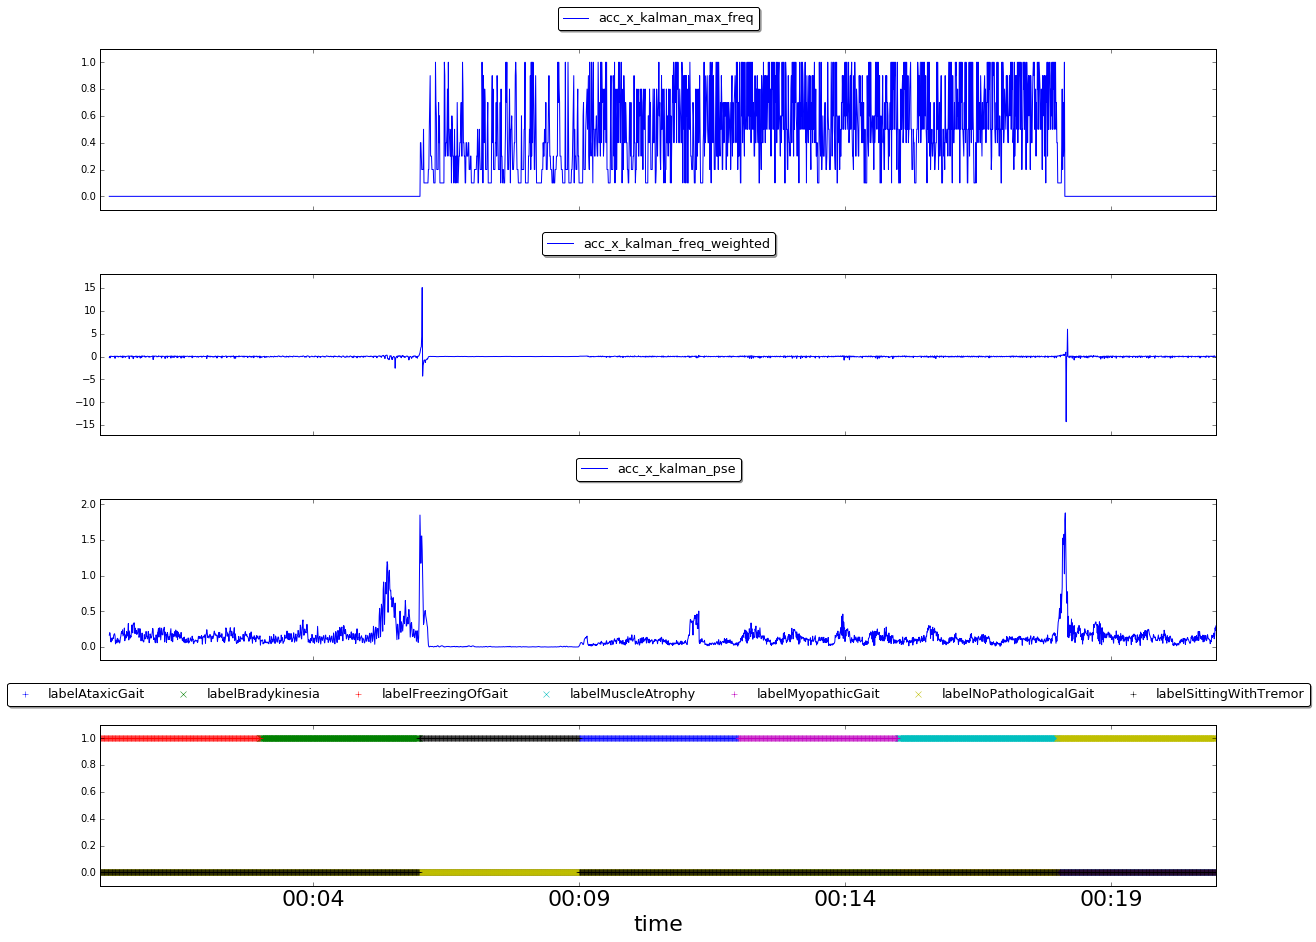

person  6


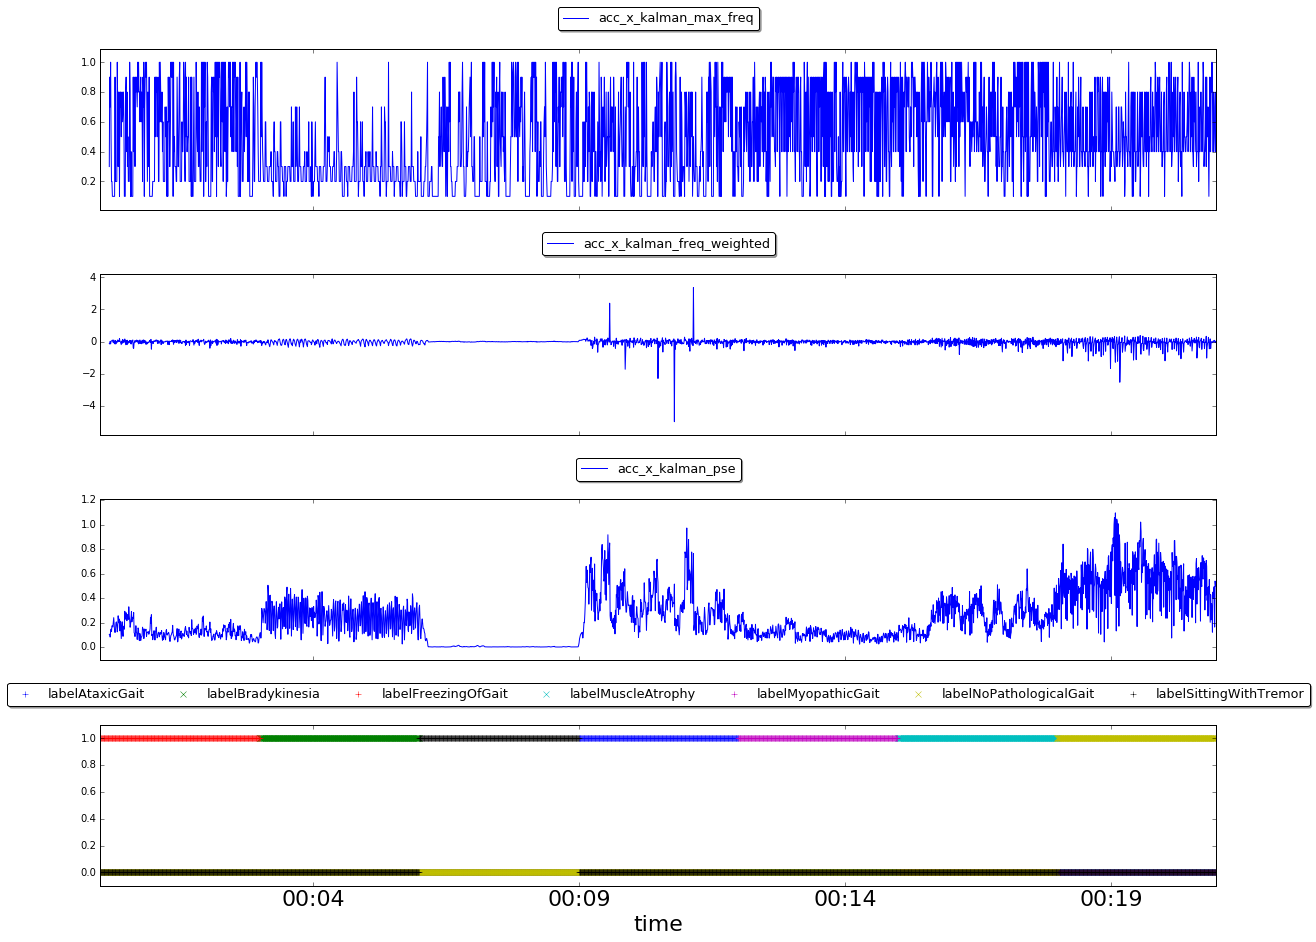

person  7


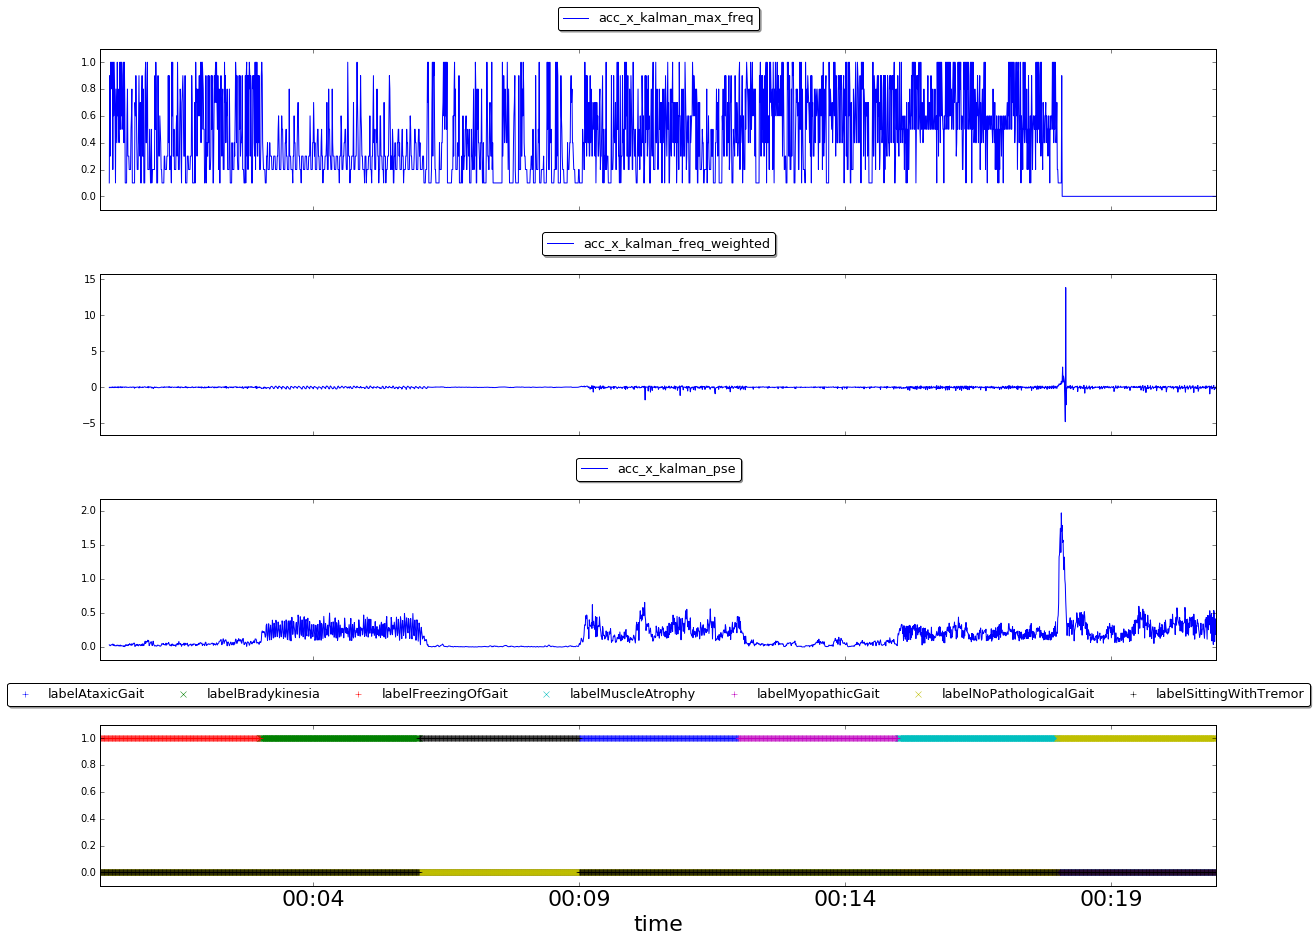

person  8


/Users/davidstap/anaconda2/envs/ml4qs/lib/python2.7/site-packages/matplotlib/axes/_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


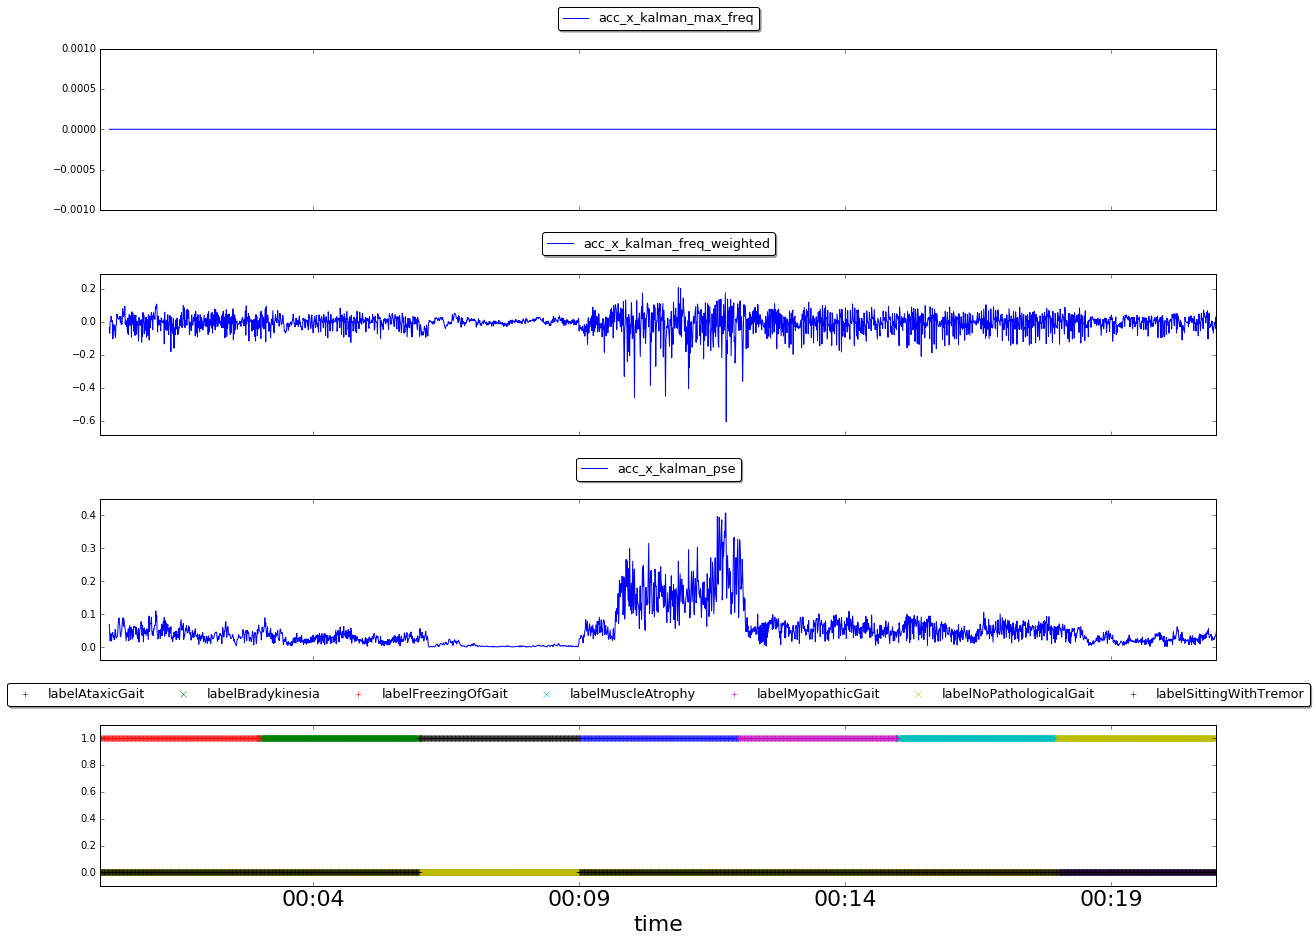

person  9


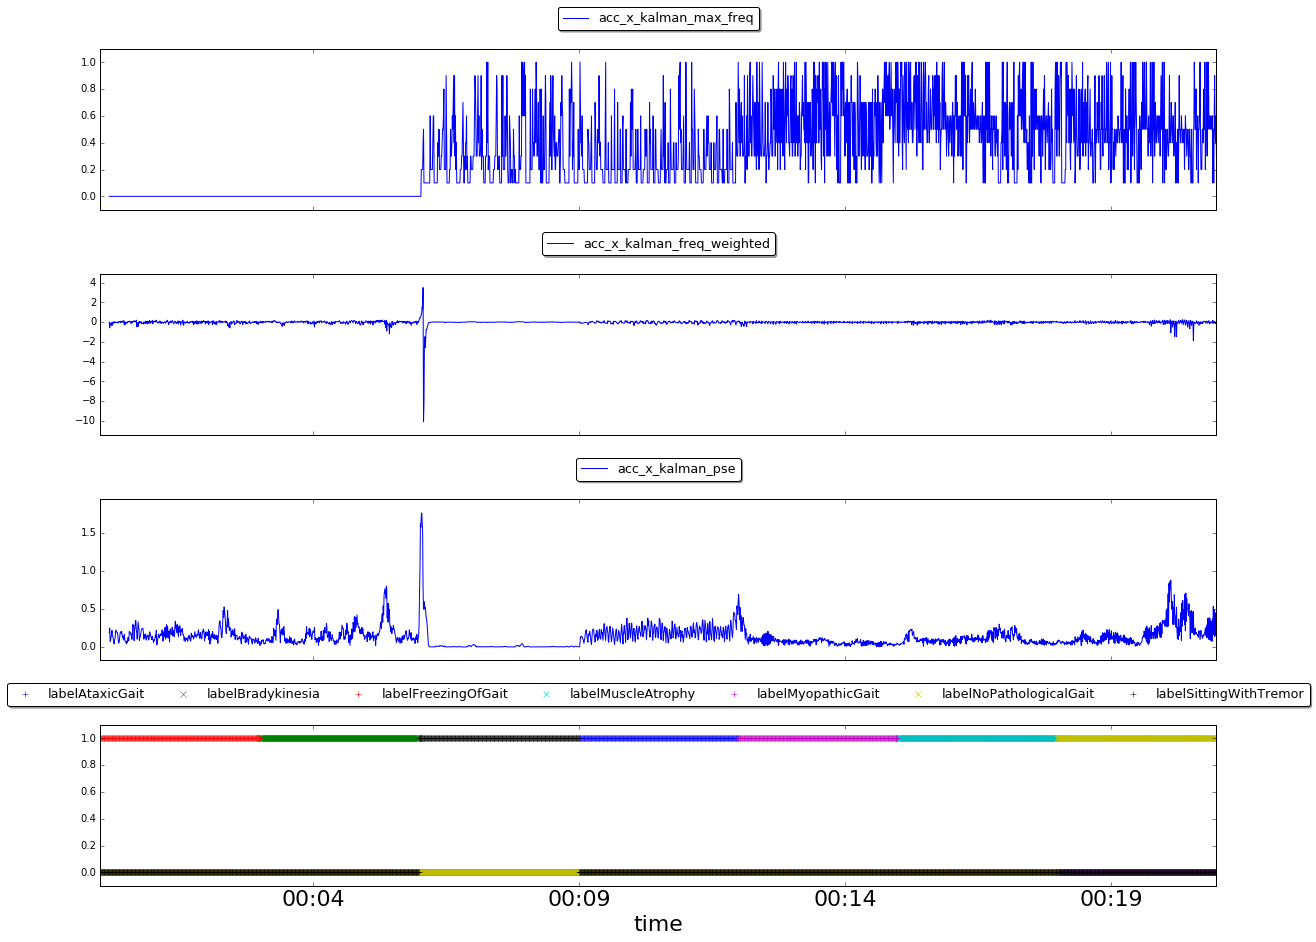

In [66]:
from Chapter4.FrequencyAbstraction import FourierTransformation

# Now we move to the frequency domain, with the same window size.
FreqAbs = FourierTransformation()
fs = float(1000)/500
ws=ws1

data_fourier = []

for i, dataset in enumerate(data):
    print 'person ',i
    periodic_predictor_cols = ['acc_x_kalman',
     'acc_y_kalman',
     'acc_z_kalman',
     'vel_x_kalman',
     'vel_y_kalman',
     'vel_z_kalman']
    
    dataset = FreqAbs.abstract_frequency(dataset, periodic_predictor_cols, int(float(10000)/milliseconds_per_instance), fs)
    DataViz.plot_dataset(dataset, ['acc_x_kalman_max_freq', 'acc_x_kalman_freq_weighted', 'acc_x_kalman_pse', 'label'], ['like', 'like', 'like', 'like'], ['line', 'line', 'line','points'])

    # Now we only take a certain percentage of overlap in the windows, otherwise our training examples will be too much alike.
    # The percentage of overlap we allow
    window_overlap = 0.9
    skip_points = int((1-window_overlap) * ws)
    dataset = dataset.iloc[::skip_points,:]


    dataset.to_csv('./datasets/parkinson_data/2_features/person{}.csv'.format(i))

# 3. Predictive modeling with / without (choose / do both) notion of time

### Feature Selection

In [1]:
#import all packages
import numpy as np
import pandas as pd
import copy
import sys
sys.path.append('ML4QS-master')
%matplotlib inline
dataset_path = './datasets/parkinson_data/raw/'
result_dataset_path = './datasets/parkinson_data/'
import scipy.io as sio
import os
from util import util
from util.VisualizeDataset import VisualizeDataset
import matplotlib
import matplotlib.pyplot as plt
from util.VisualizeDataset import VisualizeDataset
from Chapter7.PrepareDatasetForLearning import PrepareDatasetForLearning
from Chapter7.LearningAlgorithms import ClassificationAlgorithms
from Chapter7.LearningAlgorithms import RegressionAlgorithms
from Chapter7.Evaluation import ClassificationEvaluation
from Chapter7.Evaluation import RegressionEvaluation
from Chapter7.FeatureSelection import FeatureSelectionClassification
from Chapter7.FeatureSelection import FeatureSelectionRegression
from sklearn.model_selection import train_test_split
import os

# Single Person

In [34]:
#Read data set
dataset = pd.read_csv('./datasets/parkinson_data/2_features/person1.csv', index_col=0)
DataViz = VisualizeDataset()
dataset.index = dataset.index.to_datetime()
prepare = PrepareDatasetForLearning()
train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)

basic_features = ['acc_x_kalman','acc_y_kalman','acc_z_kalman','vel_x_kalman','vel_y_kalman','vel_z_kalman']
pca_features = ['pca_1','pca_2']
time_features = [name for name in dataset.columns if '_temp_' in name]
freq_features = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]
print '#basic features: ', len(basic_features)
print '#PCA features: ', len(pca_features)
print '#time features: ', len(time_features)
print '#frequency features: ', len(freq_features)
features_after_chapter_3 = list(set().union(basic_features, pca_features))
features_after_chapter_4 = list(set().union(basic_features, pca_features, time_features, freq_features))

C:\Users\Daan\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  after removing the cwd from sys.path.


#basic features:  6
#PCA features:  2
#time features:  24
#frequency features:  84


0
1
2
3
4
[0.75587392550143262, 0.98567335243553011, 0.99656160458452725, 0.99942693409742123, 1.0]
['acc_x_kalman_temp_std_ws_40', 'acc_y_kalman_temp_mean_ws_40', 'acc_y_kalman_temp_std_ws_40', 'vel_z_kalman_temp_std_ws_20', 'vel_z_kalman']


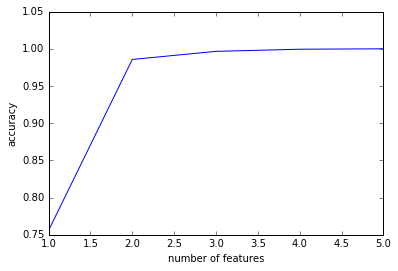

In [25]:
#feature Selection, plot shows how many features to select
#Features Selection based on Decision Trees
fs = FeatureSelectionClassification()
features, ordered_features, ordered_scores = fs.forward_selection(5, train_X[features_after_chapter_4], train_y)
print ordered_scores
print ordered_features
plot.plot(range(1, 6), ordered_scores)
plot.xlabel('number of features')
plot.ylabel('accuracy')
plot.show()
#2 or 3 selected, so 5 as input is sufficient

In [11]:
#Assign the selected (number of) features
selected_features =['acc_x_kalman_temp_mean_ws_40', 'vel_z_kalman_temp_std_ws_40', 'acc_z_kalman_temp_std_ws_40']

### Check parameters

[1.0, 1.0, 1.0, 0.99289398280802299, 0.87673352435530083]
[0.89973297730307067, 0.90080106809078786, 0.88851802403204272, 0.87837116154873163, 0.82162883845126833]


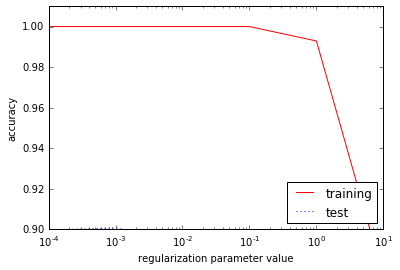

In [18]:
#Try optimize the reg parameters(alpha) for the neural network
learner = ClassificationAlgorithms()
eval = ClassificationEvaluation()
reg_parameters = [0.0001, 0.001, 0.1, 1, 10]
#0.001 is best
performance_training = []
performance_test = []

# We repeat the experiment a number of times to get a bit more robust data as the initialization of the NN is random.

repeats = 10

for reg_param in reg_parameters:
    performance_tr = 0
    performance_te = 0
    for i in range(0, repeats):
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(train_X, train_y,
                                                                                                            test_X, hidden_layer_sizes=(100, ), alpha=reg_param, max_iter=500,
                                                                                                            gridsearch=False)
        performance_tr += eval.accuracy(train_y, class_train_y)
        performance_te += eval.accuracy(test_y, class_test_y)
    performance_training.append(performance_tr/repeats)
    performance_test.append(performance_te/repeats)

plot.hold(True)
plot.semilogx(reg_parameters, performance_training, 'r-')
plot.semilogx(reg_parameters, performance_test, 'b:')
print performance_training
print performance_test
plot.xlabel('regularization parameter value')
plot.ylabel('accuracy')
plot.ylim([0.90, 1.01])
plot.legend(['training', 'test'], loc=4)
plot.hold(False)

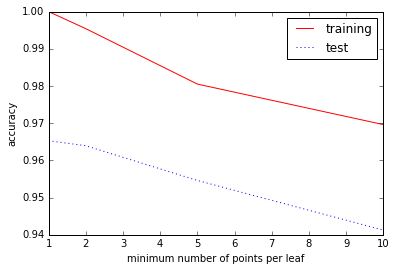

In [17]:
#check for right leaf settings on Decision Trees
leaf_settings = [1,2,5,10]
performance_training = []
performance_test = []

for no_points_leaf in leaf_settings:
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(train_X[selected_features], train_y, test_X[selected_features], min_samples_leaf=no_points_leaf,
                                                                                               gridsearch=False, print_model_details=False)
    performance_training.append(eval.accuracy(train_y, class_train_y))
    performance_test.append(eval.accuracy(test_y, class_test_y))

plot.hold(True)
plot.plot(leaf_settings, performance_training, 'r-')
plot.plot(leaf_settings, performance_test, 'b:')
plot.xlabel('minimum number of points per leaf')
plot.ylabel('accuracy')
plot.legend(['training', 'test'], loc=1)
plot.hold(False)
plot.show()
#picked value 2

initial set  &  0.6292 \emph{( 0.6061 - 0.6524 )}  &  0.6328 \emph{( 0.5976 - 0.6681 )} \\\hline
Chapter 3  &  0.6350 \emph{( 0.6119 - 0.6580 )}  &  0.6355 \emph{( 0.6003 - 0.6707 )} \\\hline
Chapter 4  &  1.0000 \emph{( 1.0000 - 1.0000 )}  &  0.8198 \emph{( 0.7917 - 0.8479 )} \\\hline
Selected features  &  0.6762 \emph{( 0.6538 - 0.6986 )}  &  0.6662 \emph{( 0.6318 - 0.7007 )} \\\hline


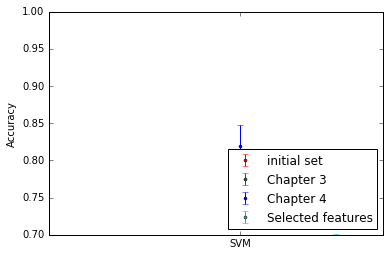

In [20]:
#Check performance SVM for multiple feature sets for one person
possible_feature_sets = [basic_features, features_after_chapter_3, features_after_chapter_4, selected_features]
feature_names = ['initial set', 'Chapter 3', 'Chapter 4', 'Selected features']
repeats = 5

scores_over_all_algs = []
# class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(train_X[selected_features], train_y, test_X[selected_features],
#                                                                                            gridsearch=True,
#                                                                                            print_model_details=True, export_tree_path=export_tree_path)

for i in range(0, len(possible_feature_sets)):
    selected_train_X = train_X[possible_feature_sets[i]]
    selected_test_X = test_X[possible_feature_sets[i]]

    performance_te_svm = 0
    performance_tr_svm = 0
    for repeat in range(0, repeats):
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.support_vector_machine_with_kernel(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_svm += eval.accuracy(train_y, class_train_y)
        performance_te_svm += eval.accuracy(test_y, class_test_y)
    overall_performance_tr_svm = performance_tr_svm/repeats
    overall_performance_te_svm = performance_te_svm/repeats

    scores_with_sd = util.print_table_row_performances(feature_names[i], len(selected_train_X.index), len(selected_test_X.index), [
                                                                                                (overall_performance_tr_svm, overall_performance_te_svm)])
    scores_over_all_algs.append(scores_with_sd)
DataViz.plot_performances_classification(['SVM'], feature_names, scores_over_all_algs)
#SVM-test 0.63-0.81 accuracy

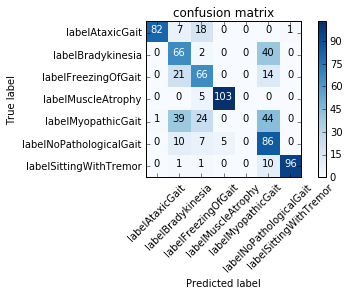

In [23]:
test_cm = eval.confusion_matrix(test_y, class_test_y, class_train_prob_y.columns)
DataViz.plot_confusion_matrix(test_cm, class_train_prob_y.columns, normalize=False)
#SVM with selected features

In [ ]:
##TODO: Run all models
#Run all models with all feature sets, plot shows all results
#Maybe change plot range below 0.70
#Reg_param included in neural network (not tried yet)
#Leaf setting included in decision tree

for i in range(0, len(possible_feature_sets)):
    selected_train_X = train_X[possible_feature_sets[i]]
    selected_test_X = test_X[possible_feature_sets[i]]

    # First we run our non deterministic classifiers a number of times to average their score.
    performance_tr_nn = 0
    performance_tr_rf = 0
    performance_tr_svm = 0
    performance_te_nn = 0
    performance_te_rf = 0
    performance_te_svm = 0

    for repeat in range(0, repeats):
        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(selected_train_X, train_y, selected_test_X, alpha=0.001 gridsearch=True)
        performance_tr_nn += eval.accuracy(train_y, class_train_y)
        performance_te_nn += eval.accuracy(test_y, class_test_y)

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_rf += eval.accuracy(train_y, class_train_y)
        performance_te_rf += eval.accuracy(test_y, class_test_y)

        class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.support_vector_machine_with_kernel(selected_train_X, train_y, selected_test_X, gridsearch=True)
        performance_tr_svm += eval.accuracy(train_y, class_train_y)
        performance_te_svm += eval.accuracy(test_y, class_test_y)


    overall_performance_tr_nn = performance_tr_nn/repeats
    overall_performance_te_nn = performance_te_nn/repeats
    overall_performance_tr_rf = performance_tr_rf/repeats
    overall_performance_te_rf = performance_te_rf/repeats
    overall_performance_tr_svm = performance_tr_svm/repeats
    overall_performance_te_svm = performance_te_svm/repeats

    # And we run our deterministic classifiers:


    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.k_nearest_neighbor(selected_train_X, train_y, selected_test_X, gridsearch=True)
    performance_tr_knn = eval.accuracy(train_y, class_train_y)
    performance_te_knn = eval.accuracy(test_y, class_test_y)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(selected_train_X, train_y, selected_test_X, gridsearch=True,min_samples_leaf=2)
    performance_tr_dt = eval.accuracy(train_y, class_train_y)
    performance_te_dt = eval.accuracy(test_y, class_test_y)

    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.naive_bayes(selected_train_X, train_y, selected_test_X)
    performance_tr_nb = eval.accuracy(train_y, class_train_y)
    performance_te_nb = eval.accuracy(test_y, class_test_y)

    scores_with_sd = util.print_table_row_performances(feature_names[i], len(selected_train_X.index), len(selected_test_X.index), [
                                                                                                (overall_performance_tr_nn, overall_performance_te_nn),
                                                                                                (overall_performance_tr_rf, overall_performance_te_rf),
                                                                                                (overall_performance_tr_svm, overall_performance_te_svm),
                                                                                                (performance_tr_knn, performance_te_knn),
                                                                                                (performance_tr_dt, performance_te_dt),
                                                                                                (performance_tr_nb, performance_te_nb)])
    scores_over_all_algs.append(scores_with_sd)

DataViz.plot_performances_classification(['NN', 'RF', 'SVM', 'KNN', 'DT', 'NB'], feature_names, scores_over_all_algs)

# Multiple People

In [ ]:
#combine people's files, make sure folder only consists of single people files, not already a combined file
files = []
source = './datasets/parkinson_data/2_features/'
for root, dirs, filenames in os.walk(source):
    for fn in filenames:
        files.append(pd.read_csv(source+fn))

data = pd.concat(files, ignore_index=True)
data.to_csv('./datasets/parkinson_data/2_features/combined.csv')

In [61]:
#Read data set for combined dataset
dataset = pd.read_csv('./datasets/parkinson_data/2_features/combined.csv', index_col=0)
# DataViz = VisualizeDataset()
dataset.index = dataset.index.to_datetime()
del dataset['Unnamed: 0.1']
prepare = PrepareDatasetForLearning()
train_X, test_X, train_y, test_y = prepare.split_single_dataset_classification(dataset, ['label'], 'like', 0.7, filter=True, temporal=False)

basic_features = ['acc_x_kalman','acc_y_kalman','acc_z_kalman','vel_x_kalman','vel_y_kalman','vel_z_kalman']
pca_features = ['pca_1','pca_2']
time_features = [name for name in dataset.columns if '_temp_' in name]
freq_features = [name for name in dataset.columns if (('_freq' in name) or ('_pse' in name))]
print '#basic features: ', len(basic_features)
print '#PCA features: ', len(pca_features)
print '#time features: ', len(time_features)
print '#frequency features: ', len(freq_features)
features_after_chapter_3 = list(set().union(basic_features, pca_features))
features_after_chapter_4 = list(set().union(basic_features, pca_features, time_features, freq_features))

C:\Users\Daan\Anaconda3\envs\ml4qs\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  after removing the cwd from sys.path.


#basic features:  6
#PCA features:  2
#time features:  24
#frequency features:  84


0
1
2
3
4
[0.68001374806667814, 0.76897519619636823, 0.80661052872773098, 0.86412327433121383, 0.96482786274846766]
['vel_z_kalman_freq_0.4_Hz_ws_20', 'vel_z_kalman_freq_0.2_Hz_ws_20', 'acc_z_kalman_freq_0.1_Hz_ws_20', 'vel_x_kalman_temp_std_ws_40', 'acc_z_kalman_temp_mean_ws_40']


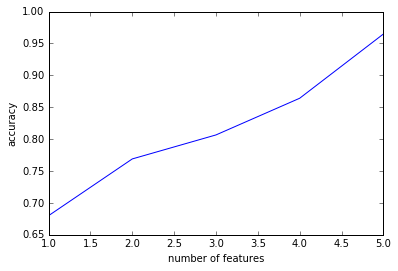

In [62]:
#Feature Selection for all 10 people
fs = FeatureSelectionClassification()
features, ordered_features, ordered_scores = fs.forward_selection(5, train_X[features_after_chapter_4], train_y)
print ordered_scores
print ordered_features
plot.plot(range(1, 6), ordered_scores)
plot.xlabel('number of features')
plot.ylabel('accuracy')
plot.show()
#run with 5, all selected. Probably want to run with some more (e.g 10/15)

In [64]:
#Assign the selected number of features for combined dataset
selected_features =['vel_z_kalman_freq_0.4_Hz_ws_20', 'vel_z_kalman_freq_0.2_Hz_ws_20', 'acc_z_kalman_freq_0.1_Hz_ws_20', 'vel_x_kalman_temp_std_ws_40', 'acc_z_kalman_temp_mean_ws_40']

initial set  &  0.9276 \emph{( 0.9237 - 0.9315 )}  &  0.6525 \emph{( 0.6415 - 0.6636 )} \\\hline
Chapter 3  &  0.9325 \emph{( 0.9287 - 0.9363 )}  &  0.6647 \emph{( 0.6538 - 0.6756 )} \\\hline
Chapter 4  &  0.9963 \emph{( 0.9954 - 0.9972 )}  &  0.9698 \emph{( 0.9658 - 0.9738 )} \\\hline
Selected features  &  0.9653 \emph{( 0.9625 - 0.9681 )}  &  0.8024 \emph{( 0.7931 - 0.8116 )} \\\hline


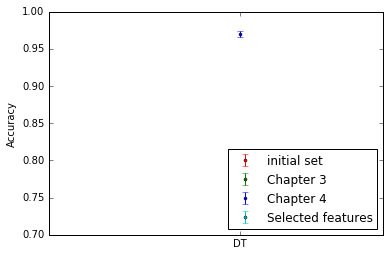

In [66]:
#Check performance Decisoin Tree for multiple feature sets for all 10 people combined
possible_feature_sets = [basic_features, features_after_chapter_3, features_after_chapter_4, selected_features]
feature_names = ['initial set', 'Chapter 3', 'Chapter 4', 'Selected features']
#possible_feature_sets = [selected_features]
#feature_names = ['Selected features']

repeats = 3

scores_over_all_algs = []
for i in range(0, len(possible_feature_sets)):
    selected_train_X = train_X[possible_feature_sets[i]]
    selected_test_X = test_X[possible_feature_sets[i]]
    class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.decision_tree(selected_train_X, train_y, selected_test_X, gridsearch=True, min_samples_leaf=2)
    performance_tr_dt = eval.accuracy(train_y, class_train_y)
    performance_te_dt = eval.accuracy(test_y, class_test_y)
    scores_with_sd = util.print_table_row_performances(feature_names[i], len(selected_train_X.index), len(selected_test_X.index), [
                                                                                                (performance_tr_dt, performance_te_dt)])
    scores_over_all_algs.append(scores_with_sd)
DataViz.plot_performances_classification(['DT'], feature_names, scores_over_all_algs)
#DT-all people-test 0.66-0.96 accuracy